In [1]:
from music21 import *

In [2]:
from music21 import converter, chord

# Load the MusicXML score
score = converter.parse('../dataset-converted-xml/Drop D/Rock/Linkin Park - What Ive Done (ver 7 by igus).musicxml')

# Dictionary to store chord names by actual part name
chord_names_by_voice = {}

# Loop through each part (voice)
for part in score.parts:
    voice_name = part.partName or "Unnamed Voice"
    chord_names_by_voice[voice_name] = []

    # Flatten the structure so we get all notes/chords
    for element in part.flat.notes:
        if isinstance(element, chord.Chord):
            name = element.commonName or "Unknown"
            chord_names_by_voice[voice_name].append(name)

# Show result
for voice, names in chord_names_by_voice.items():
    print(f"{voice}: {names}")

Vocals [Chester Bennington]: []
Backing Vocals [Mike Shinoda]: []
Piano RH [Mike Shinoda]: ['Perfect Fifth', 'Perfect Fifth', 'Perfect Fifth', 'Perfect Fifth', 'Perfect Fifth', 'Perfect Fifth']
Piano LH [Mike Shinoda]: ['Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfect Octave', 'Perfe

/Volumes/T7 Shield/Datasets/Ultimate Guitar/ug-dataset/.env/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [3]:
chord_names_by_voice["Guitar 2 [Mike Shinoda]"]

['Perfect Fifth',
 'Perfect Fifth',
 'quartal trichord',
 'quartal trichord',
 'quartal trichord',
 'quartal trichord',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Perfect Fifth with octave doublings',
 'Diminished Sixth with octave doublings',
 'Diminished Sixth with octave doublings',
 'Diminished Sixth with octave doublings',
 'Diminished Sixth with octave doublings',
 'Diminished Sixth with octave doublings',
 'Diminished Sixth with o

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
c = Counter(chord_names_by_voice["Guitar 2 [Mike Shinoda]"])
c

Counter({'Perfect Fifth with octave doublings': 566,
         'Diminished Sixth with octave doublings': 192,
         'Perfect Fifth': 142,
         'Diminished Sixth': 32,
         'quartal trichord': 20,
         'Perfect Fourth with octave doublings': 16,
         'Perfect Twelfth': 6})

In [5]:
# To store one chord per harmonic change
pitched_chord_changes_by_voice = {}

for part in score.parts:
    voice_name = part.partName or "Unnamed Voice"
    pitched_chord_changes_by_voice[voice_name] = []

    last_chord_signature = None
    for element in part.flat.notes:
        if isinstance(element, chord.Chord):
            # Define current chord's harmonic signature
            current_signature = (tuple(element.normalOrder), element.bass().nameWithOctave)

            if current_signature != last_chord_signature:
                # Use pitchedCommonName or fallback options
                name = element.pitchedCommonName or element.commonName or "Unknown"
                pitched_chord_changes_by_voice[voice_name].append(name)
                last_chord_signature = current_signature

# Output results
for voice, changes in pitched_chord_changes_by_voice.items():
    print(f"{voice}:")
    for ch in changes:
        print(f"  - {ch}")

Vocals [Chester Bennington]:
Backing Vocals [Mike Shinoda]:
Piano RH [Mike Shinoda]:
  - Perfect Fifth above G
Piano LH [Mike Shinoda]:
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
  - Perfect Octave above G
  - Perfect Octave above A#
  - Perfect Octave above F
  - Perfect Octave above C
Sampler [Mr. Hahn]:
Guitar 1 [Brad Delson]:
  - Diminished Seventh above A#
Guitar 2 [Mike Shinoda]:
  - Perfect Fifth above G
  - G-quartal trichord
  - Perfect Fifth with octave doublings above G
  - Diminish

/Volumes/T7 Shield/Datasets/Ultimate Guitar/ug-dataset/.env/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [6]:
c2 = Counter(pitched_chord_changes_by_voice["Guitar 2 [Mike Shinoda]"])
c2

Counter({'Perfect Fifth with octave doublings above G': 15,
         'Diminished Sixth with octave doublings above A#': 12,
         'Perfect Fifth with octave doublings above F': 12,
         'Perfect Fifth with octave doublings above C': 12,
         'Perfect Fifth above F': 4,
         'Perfect Fifth above G': 3,
         'G-quartal trichord': 3,
         'Perfect Fourth with octave doublings above D': 2,
         'Perfect Fifth above D#': 2,
         'Diminished Sixth above A#': 2,
         'Perfect Fifth above C': 2})

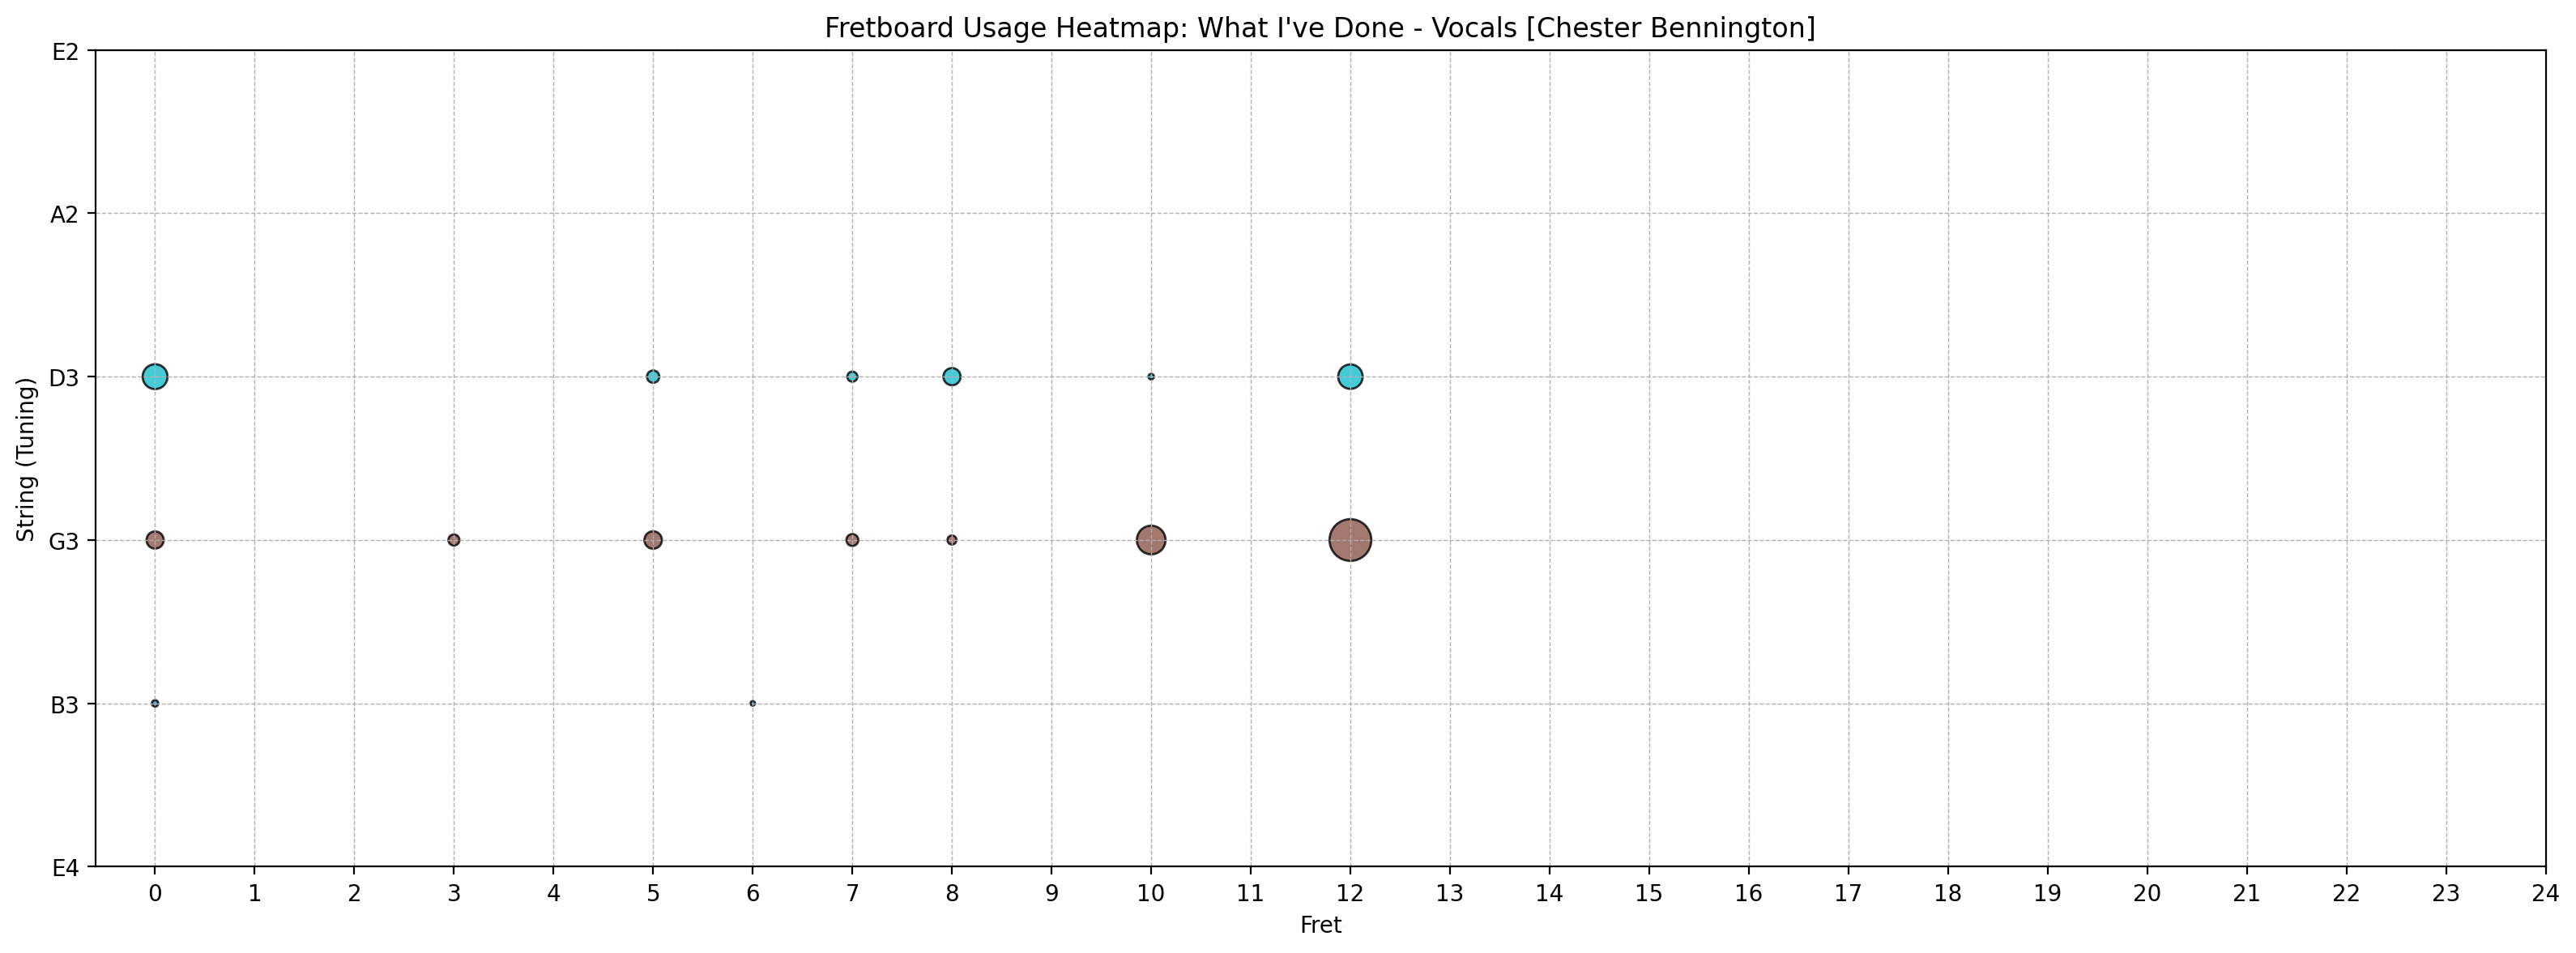

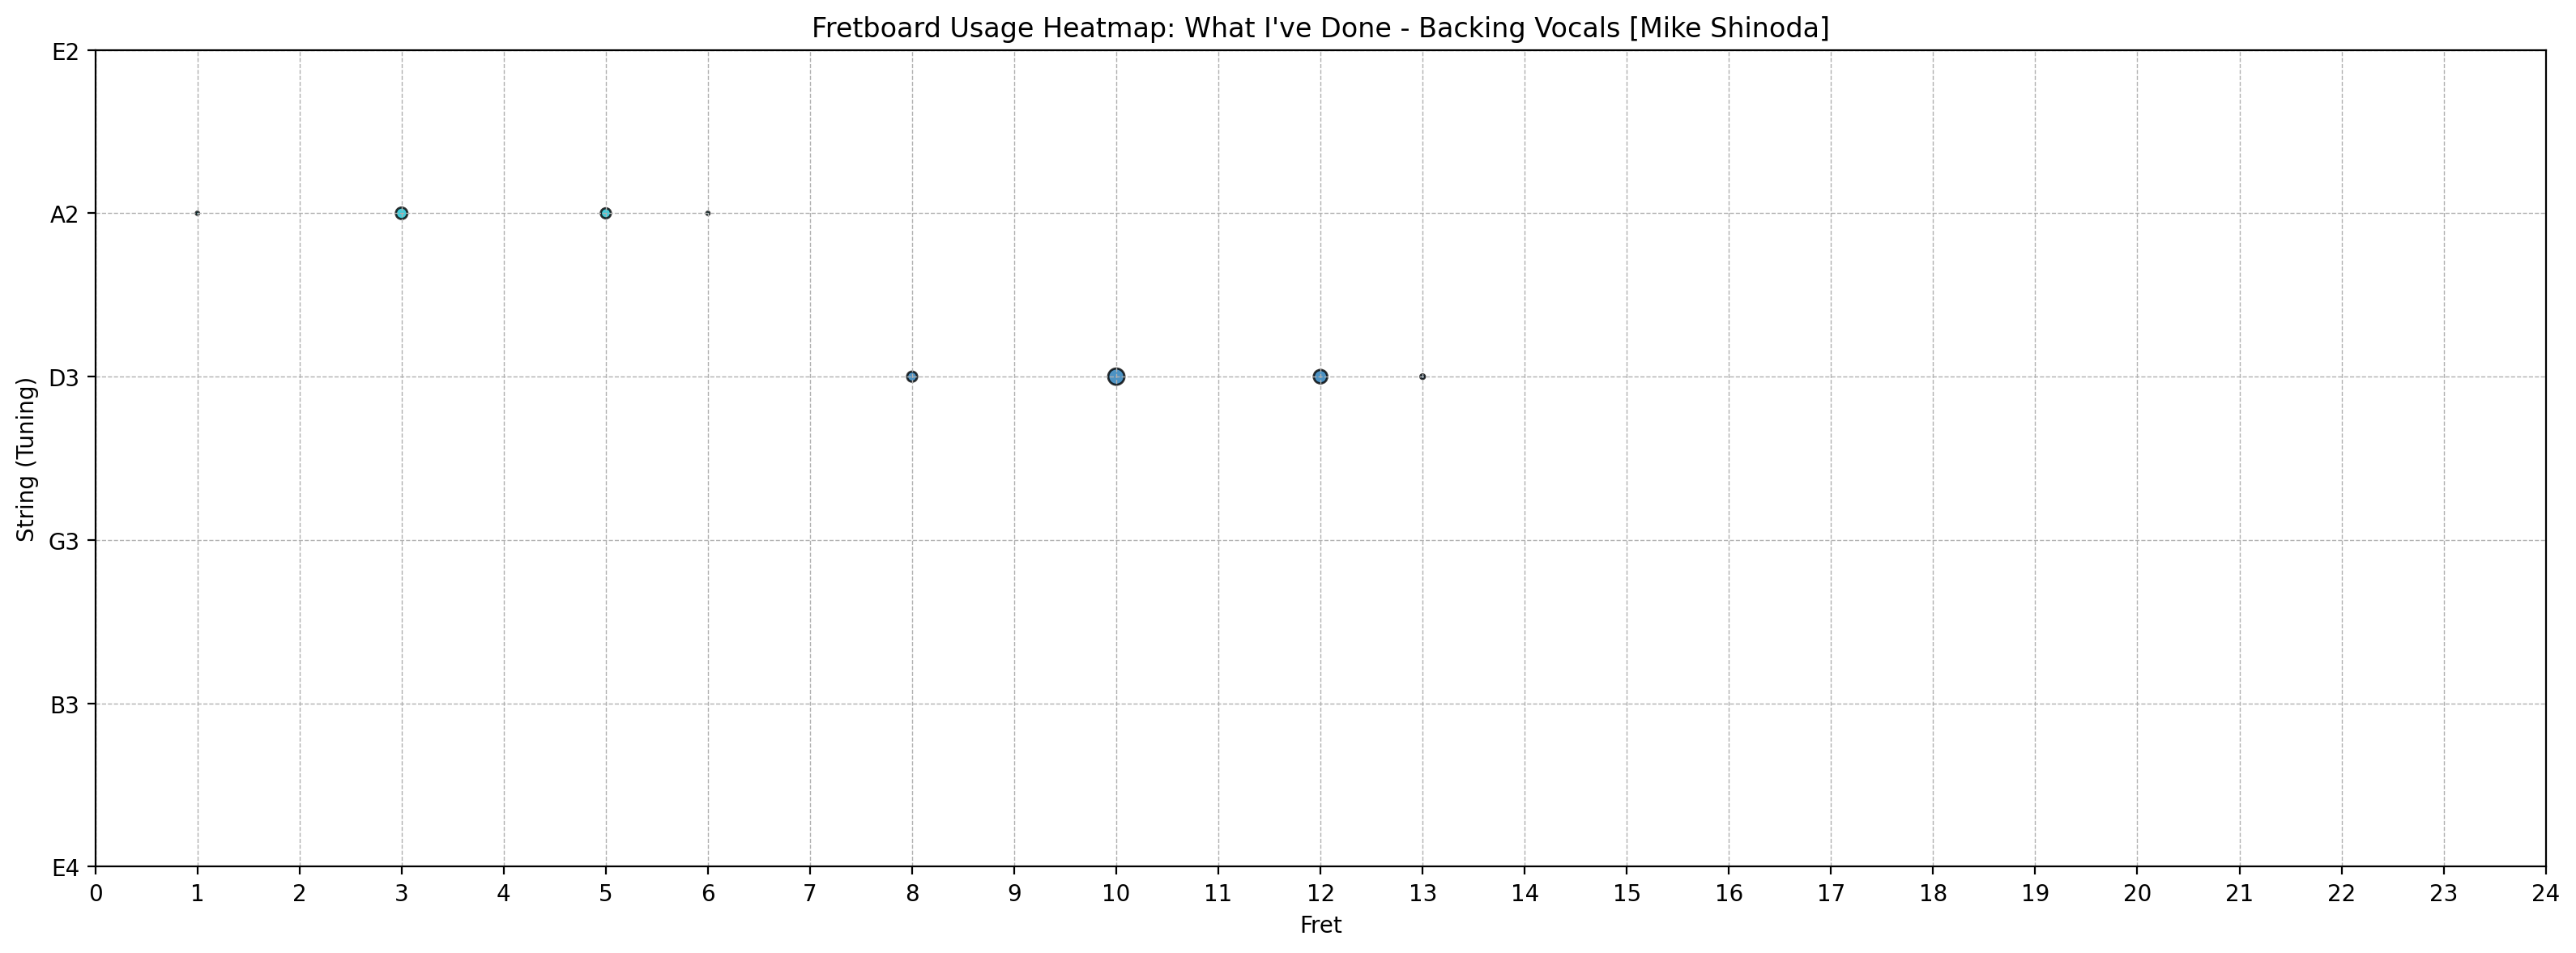

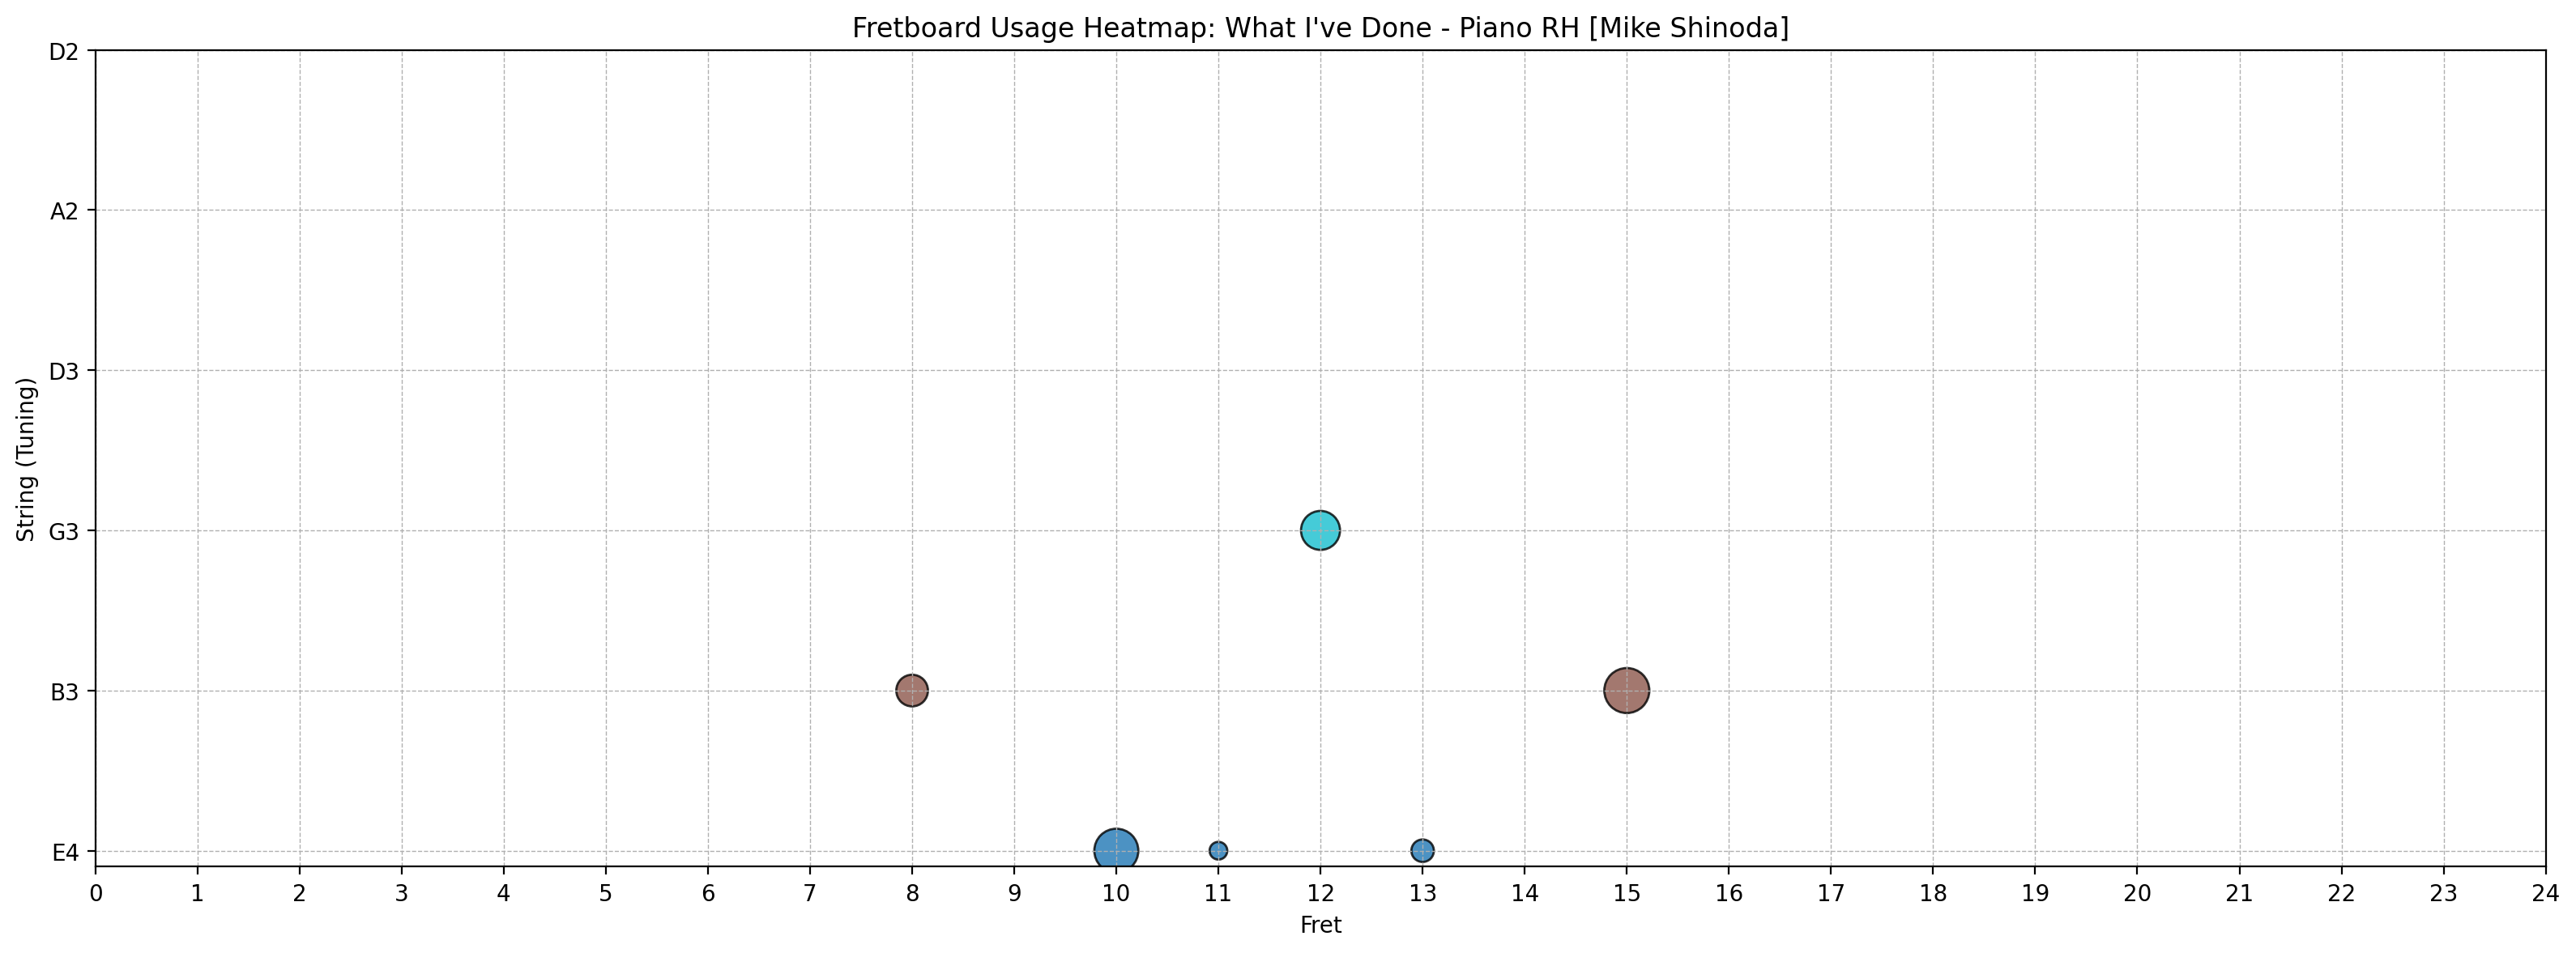

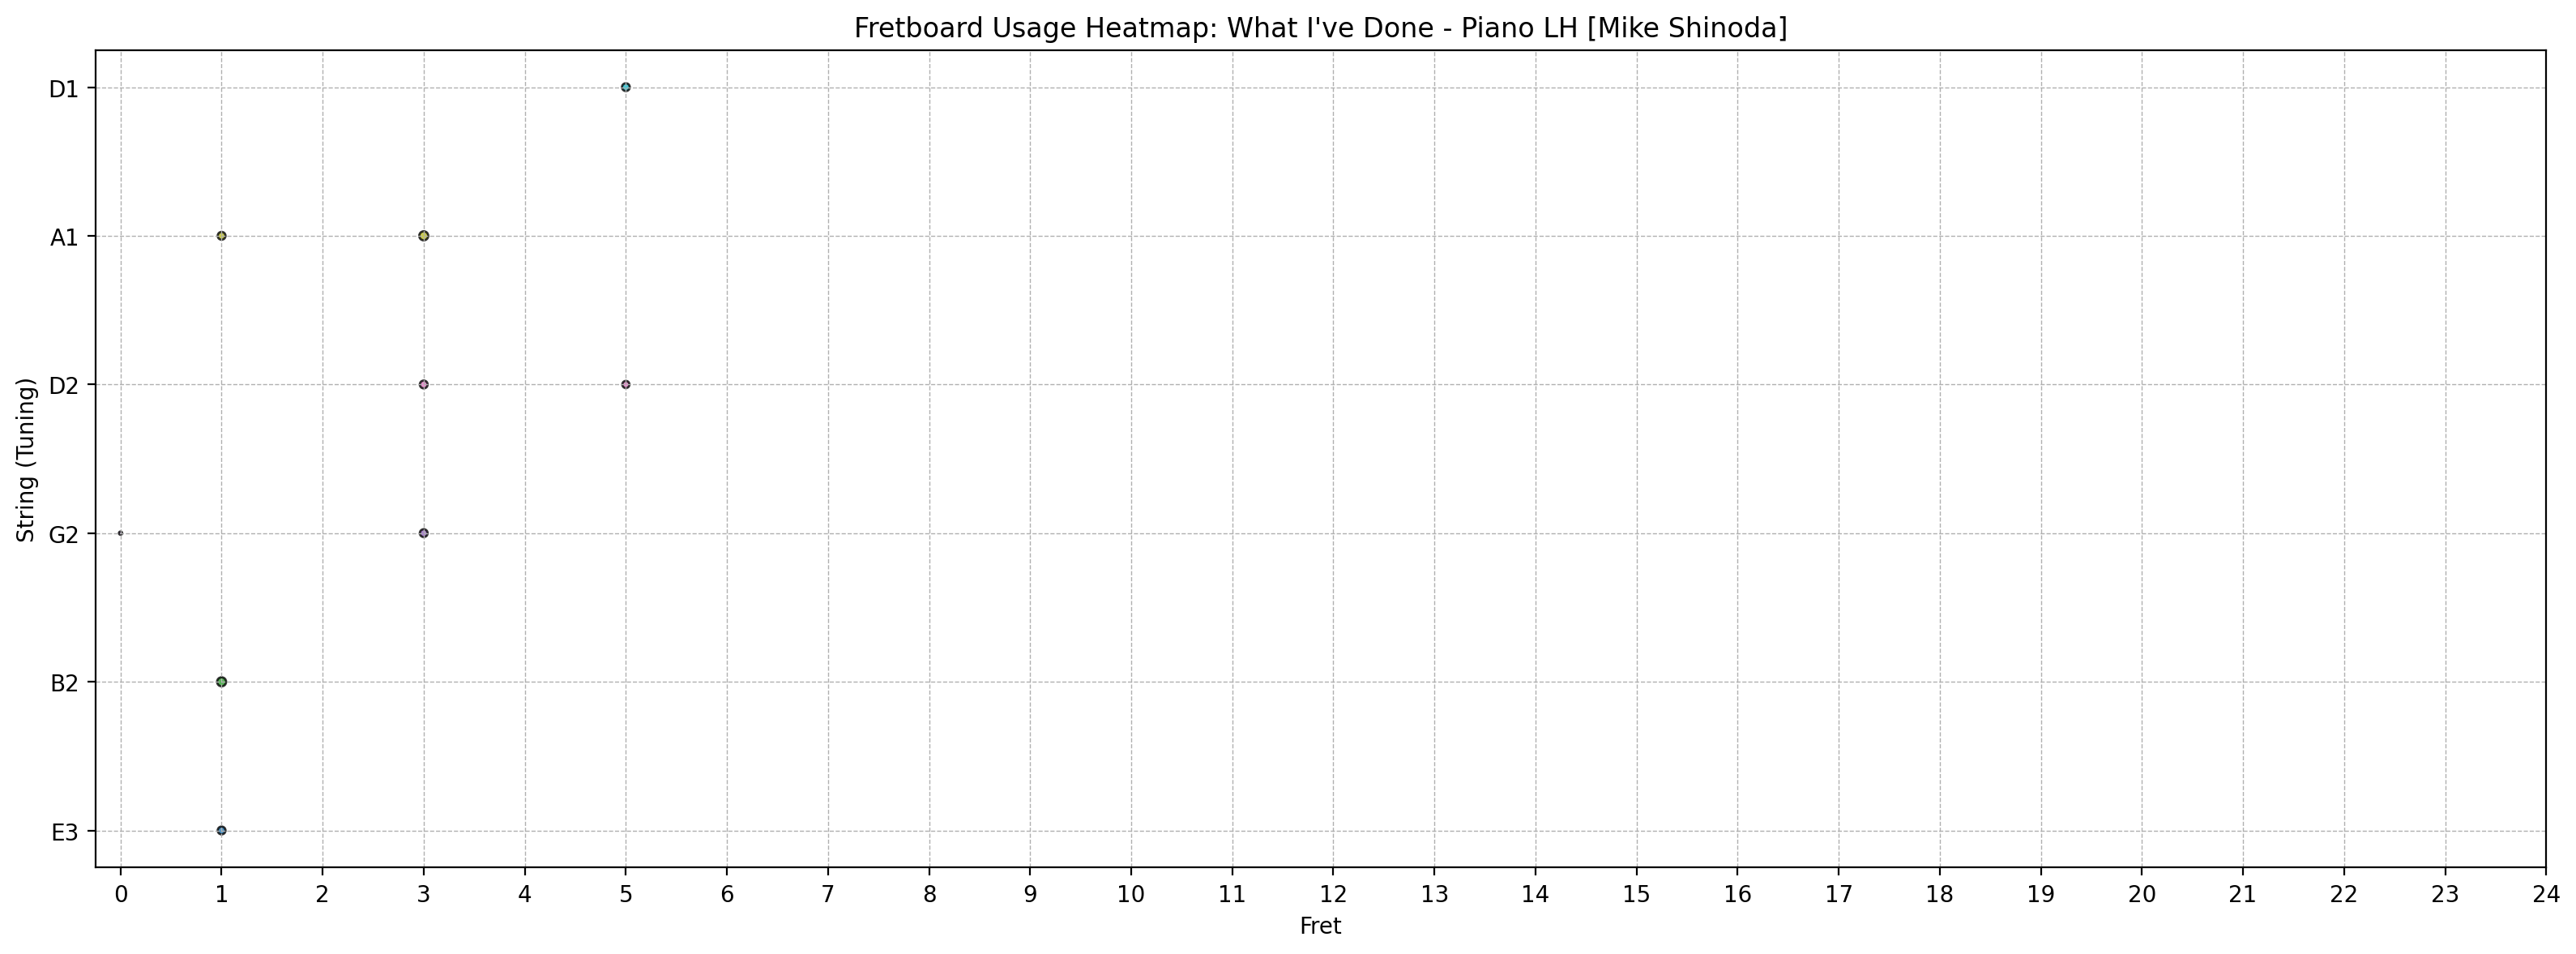

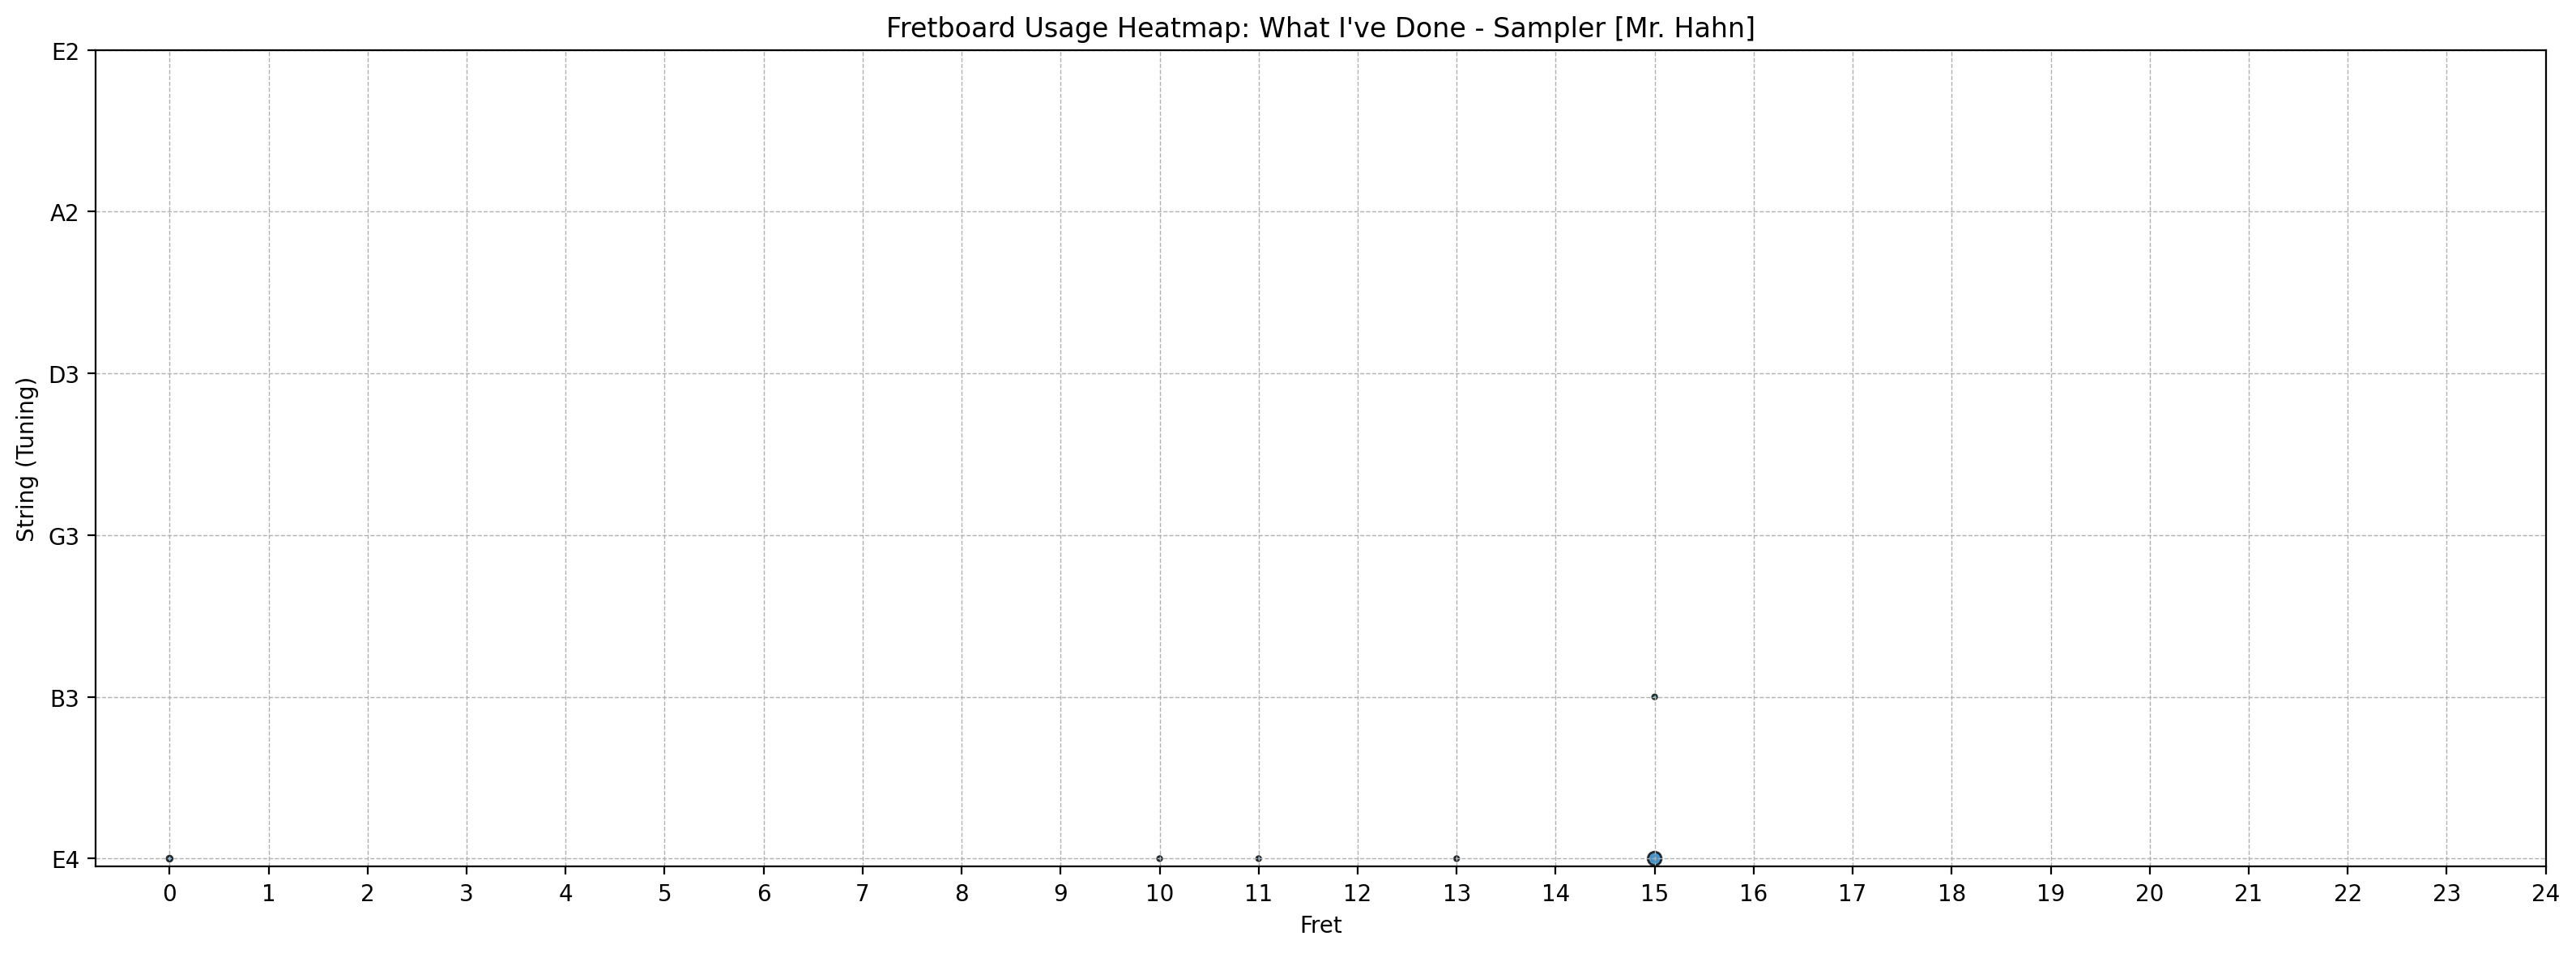

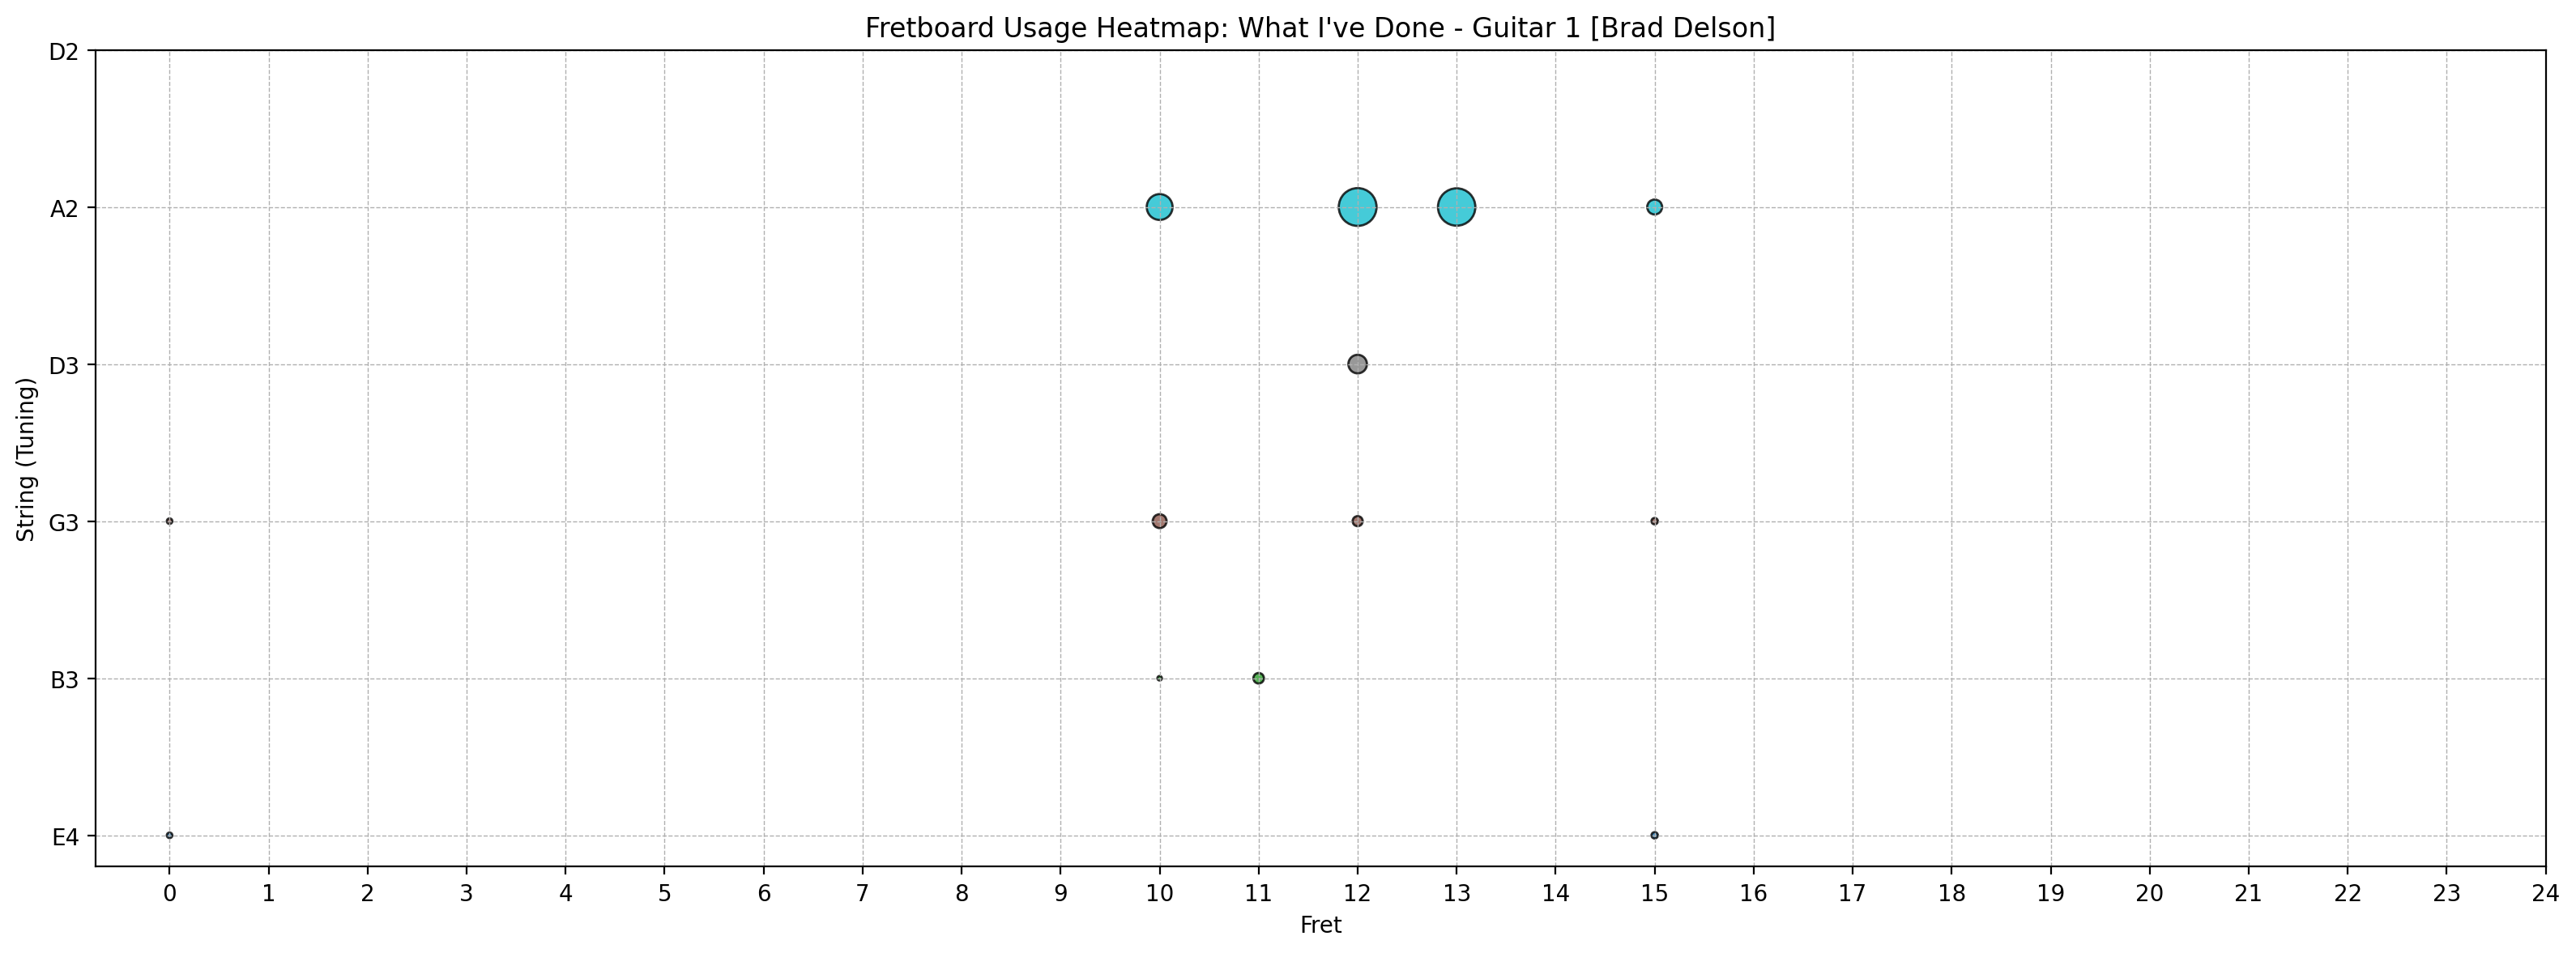

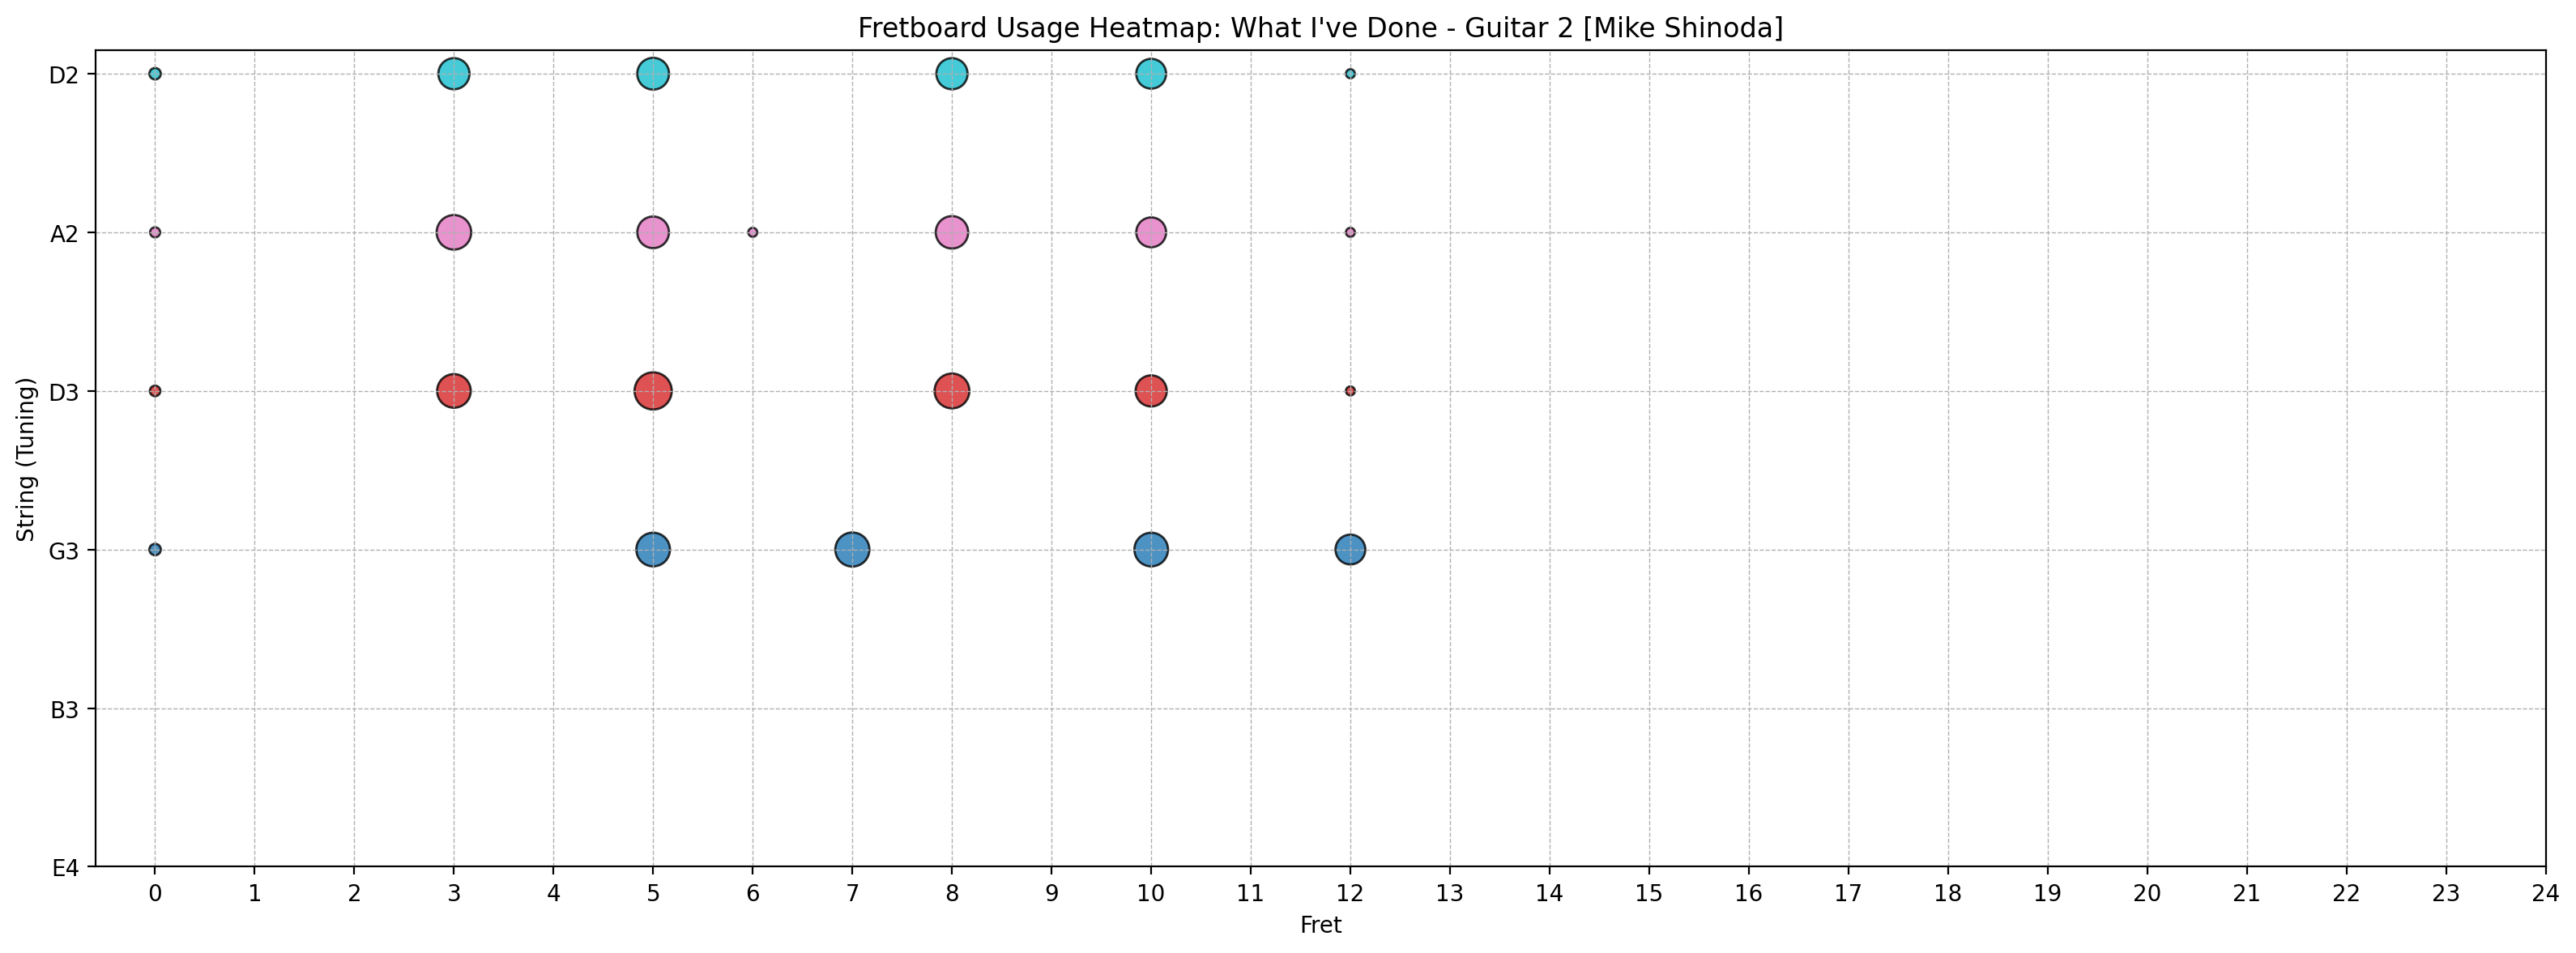

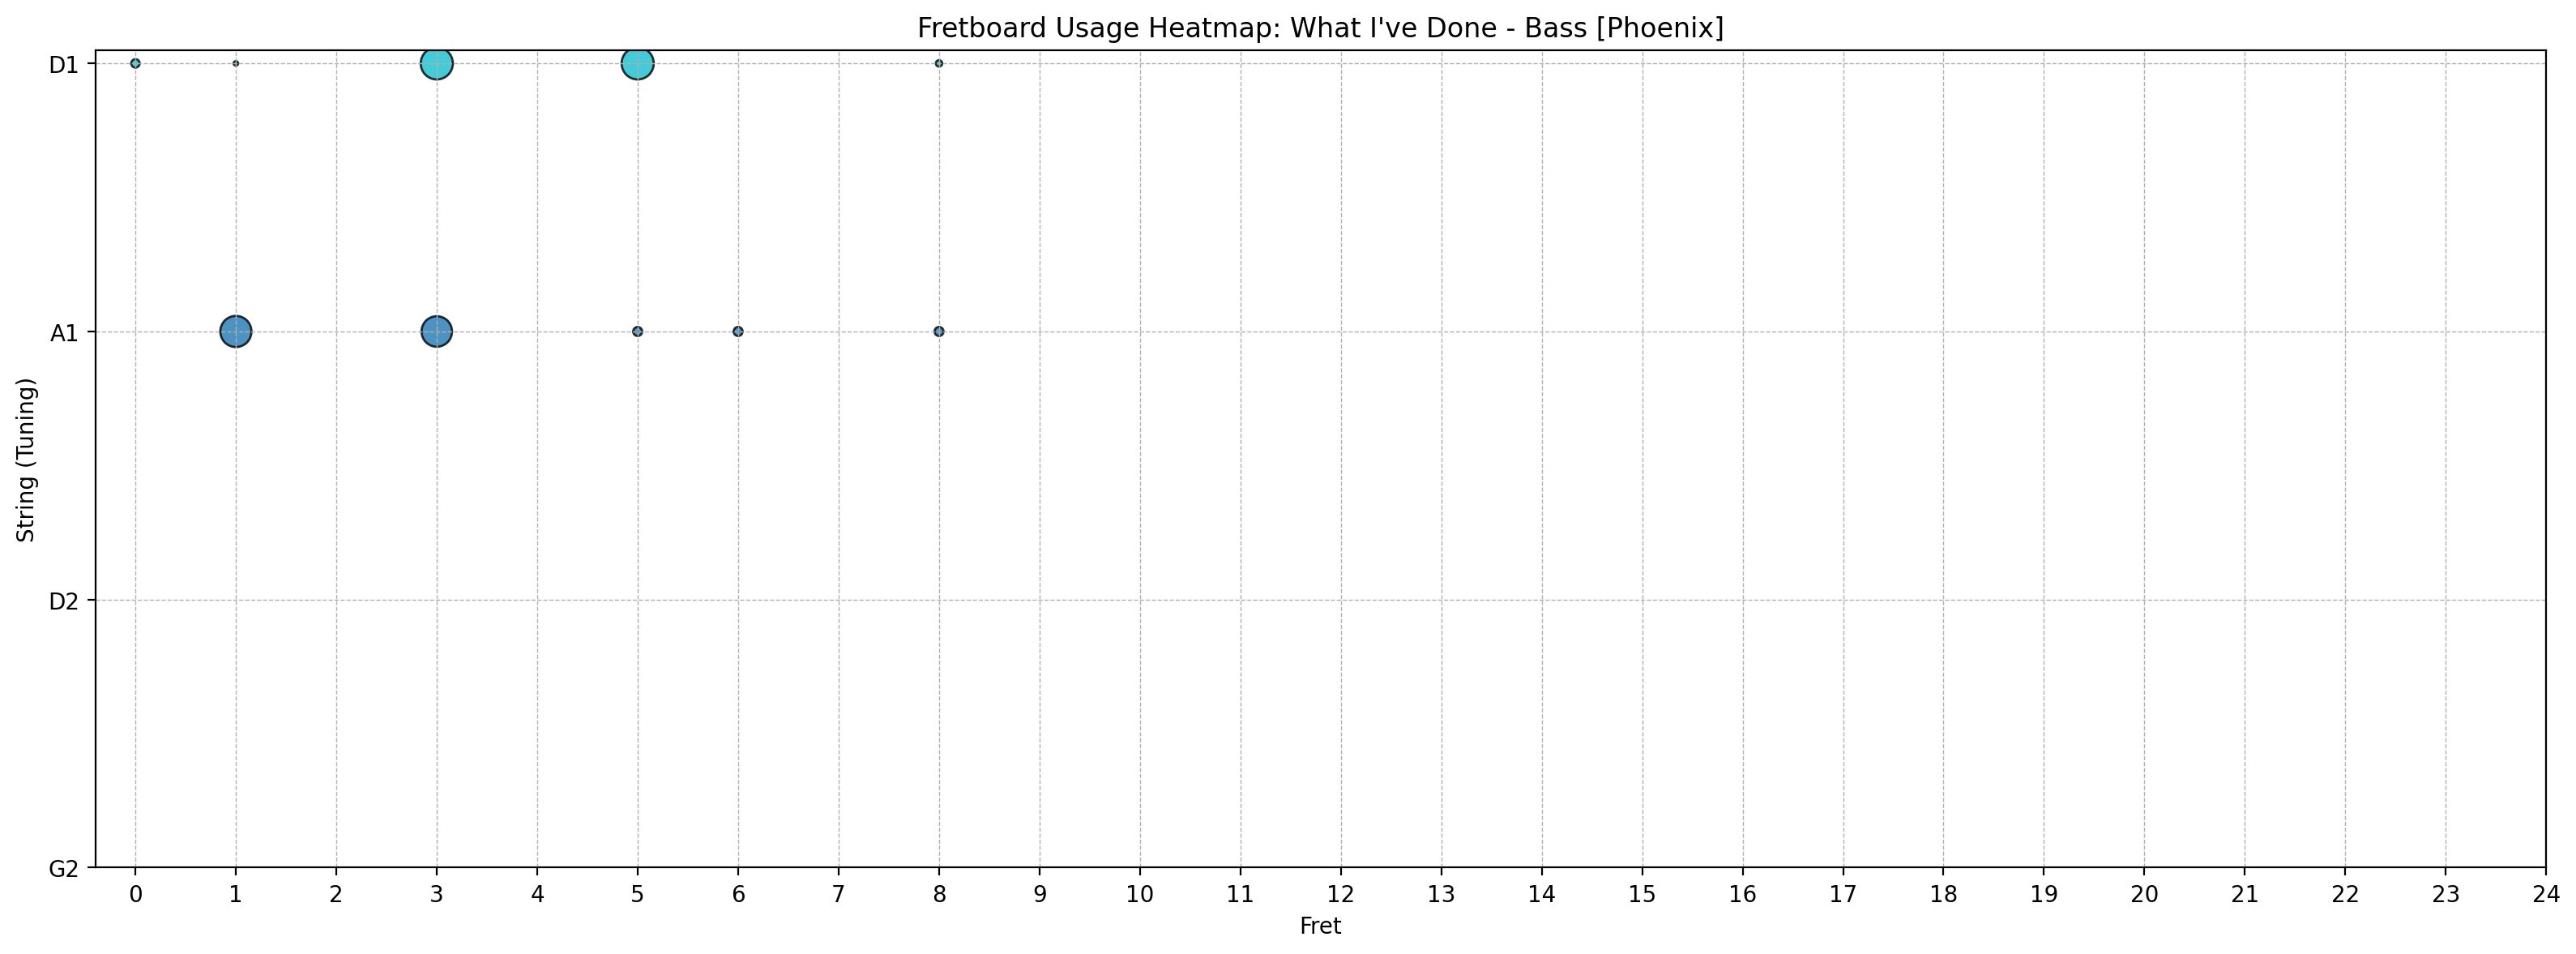

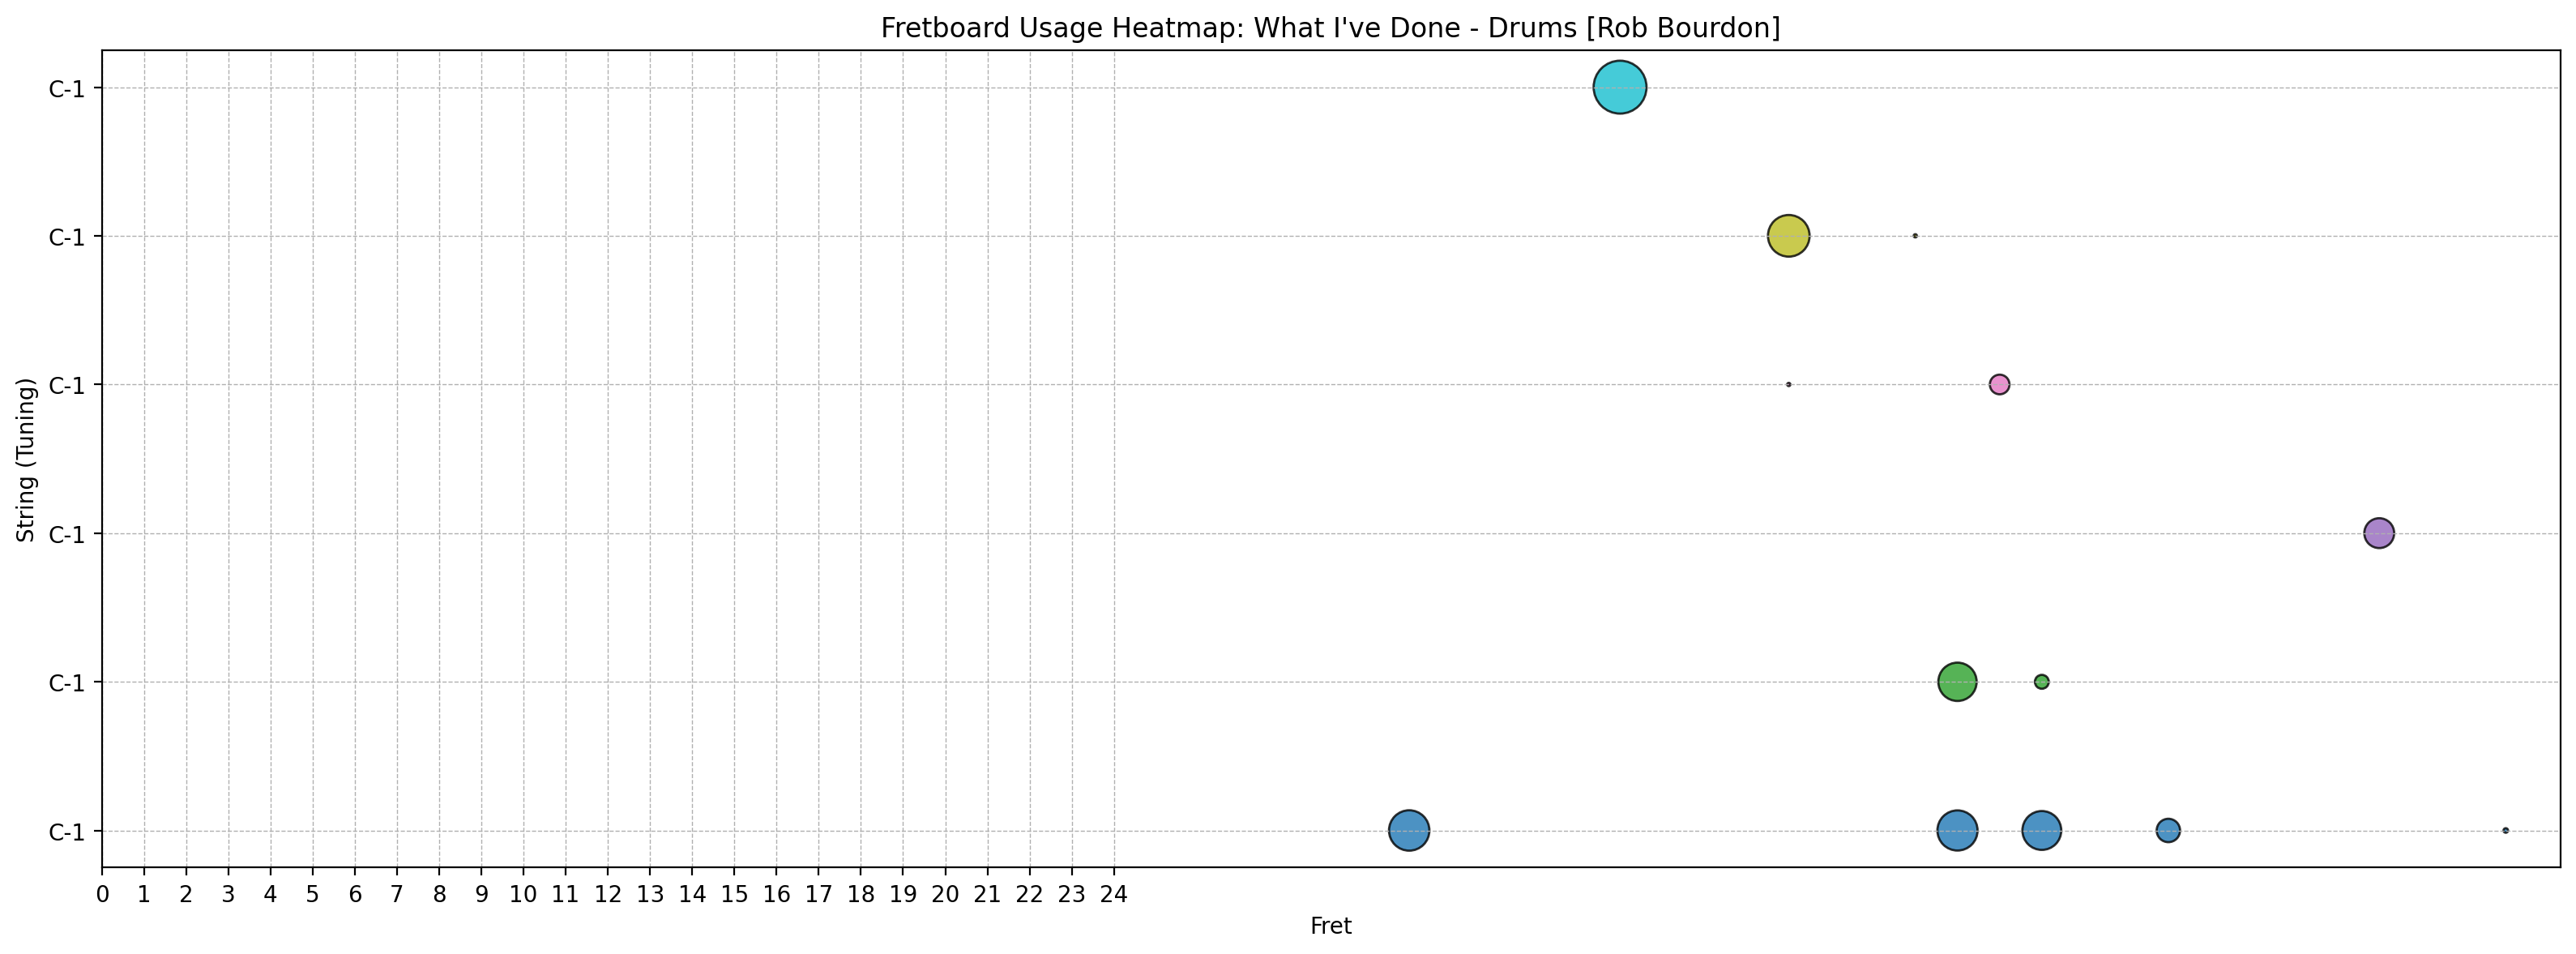

In [9]:
import json

# Load your JSON
with open("analysis_results.json") as f:
    data = json.load(f)

# Choose the song
song = next(song for song in data if song["title"] == "What I've Done")

# Iterate over each track
for track in song["tracks"]:
    tuning = track["tuning"]
    string_fret_frequency = track["string_fret_frequency"]
    num_strings = len(tuning)

    x, y, sizes, colors = [], [], [], []

    for string_str, fret_dict in string_fret_frequency.items():
        string_num = int(string_str)
        for fret_str, count in fret_dict.items():
            fret = int(fret_str)
            x.append(fret)
            y.append(num_strings - string_num)
            sizes.append(count * 2)
            colors.append(string_num)

    # Create string labels from tuning
    string_labels = []
    for midi_val in reversed(tuning):
        p = pitch.Pitch()
        p.midi = midi_val
        string_labels.append(p.nameWithOctave)

    # Plot for this track
    plt.figure(figsize=(16, 6))
    plt.scatter(x, y, s=sizes, c=colors, cmap='tab10', alpha=0.8, edgecolors='k')

    plt.xticks(range(0, 25))
    plt.yticks(range(num_strings), string_labels)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlabel("Fret")
    plt.ylabel("String (Tuning)")
    plt.title(f'Fretboard Usage Heatmap: {song["title"]} - {track["name"]}')
    plt.tight_layout()
    plt.show()

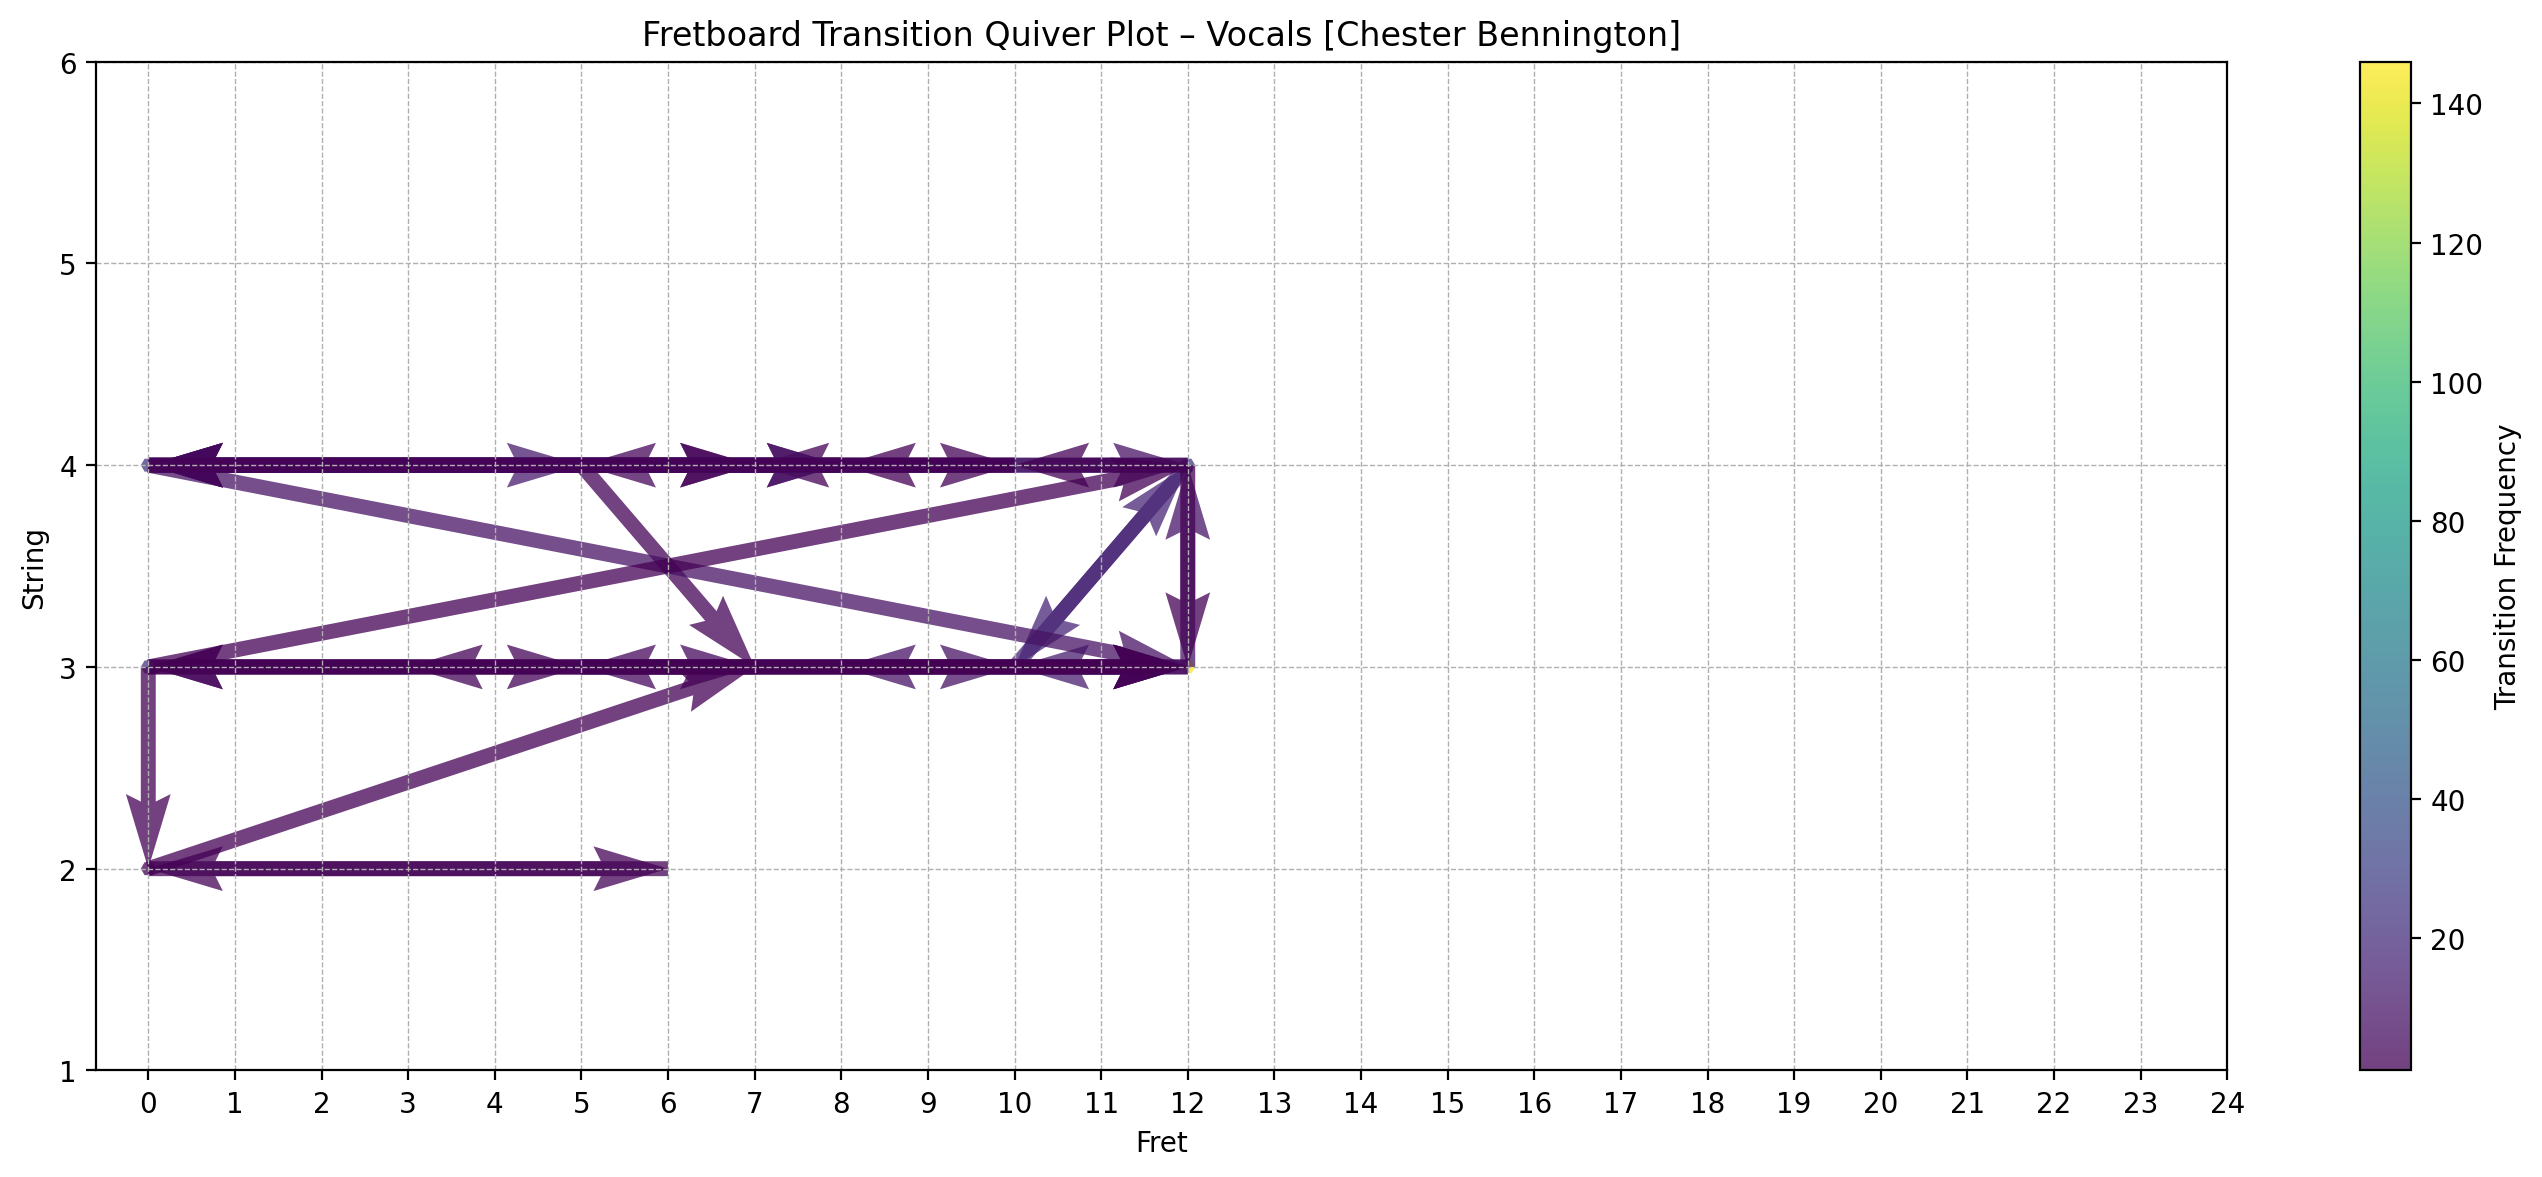

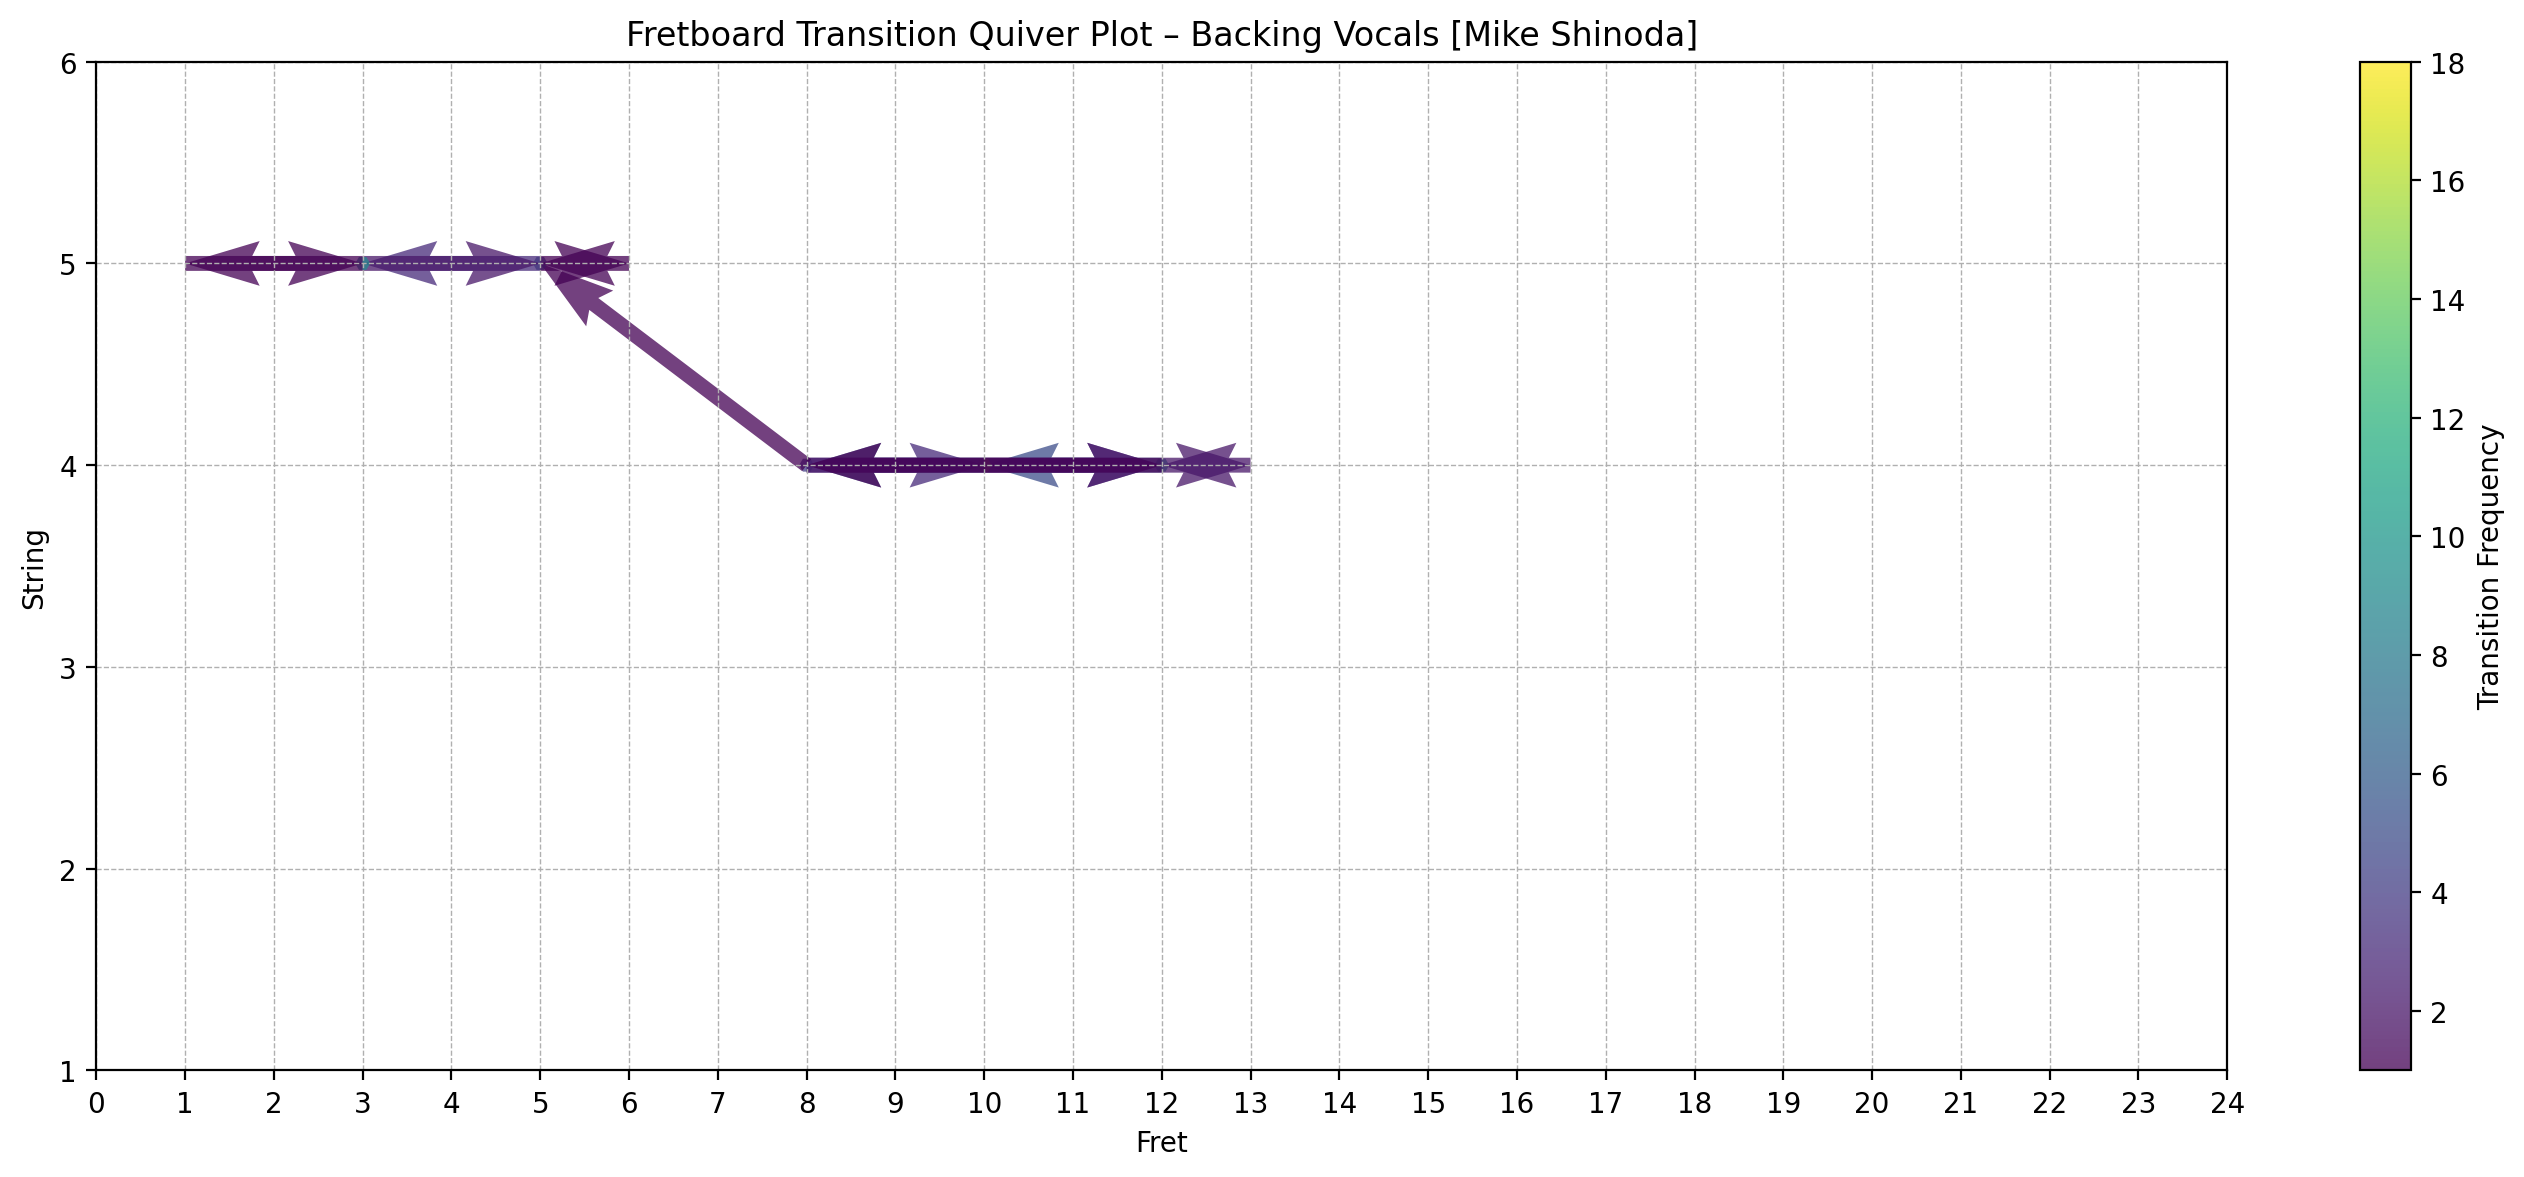

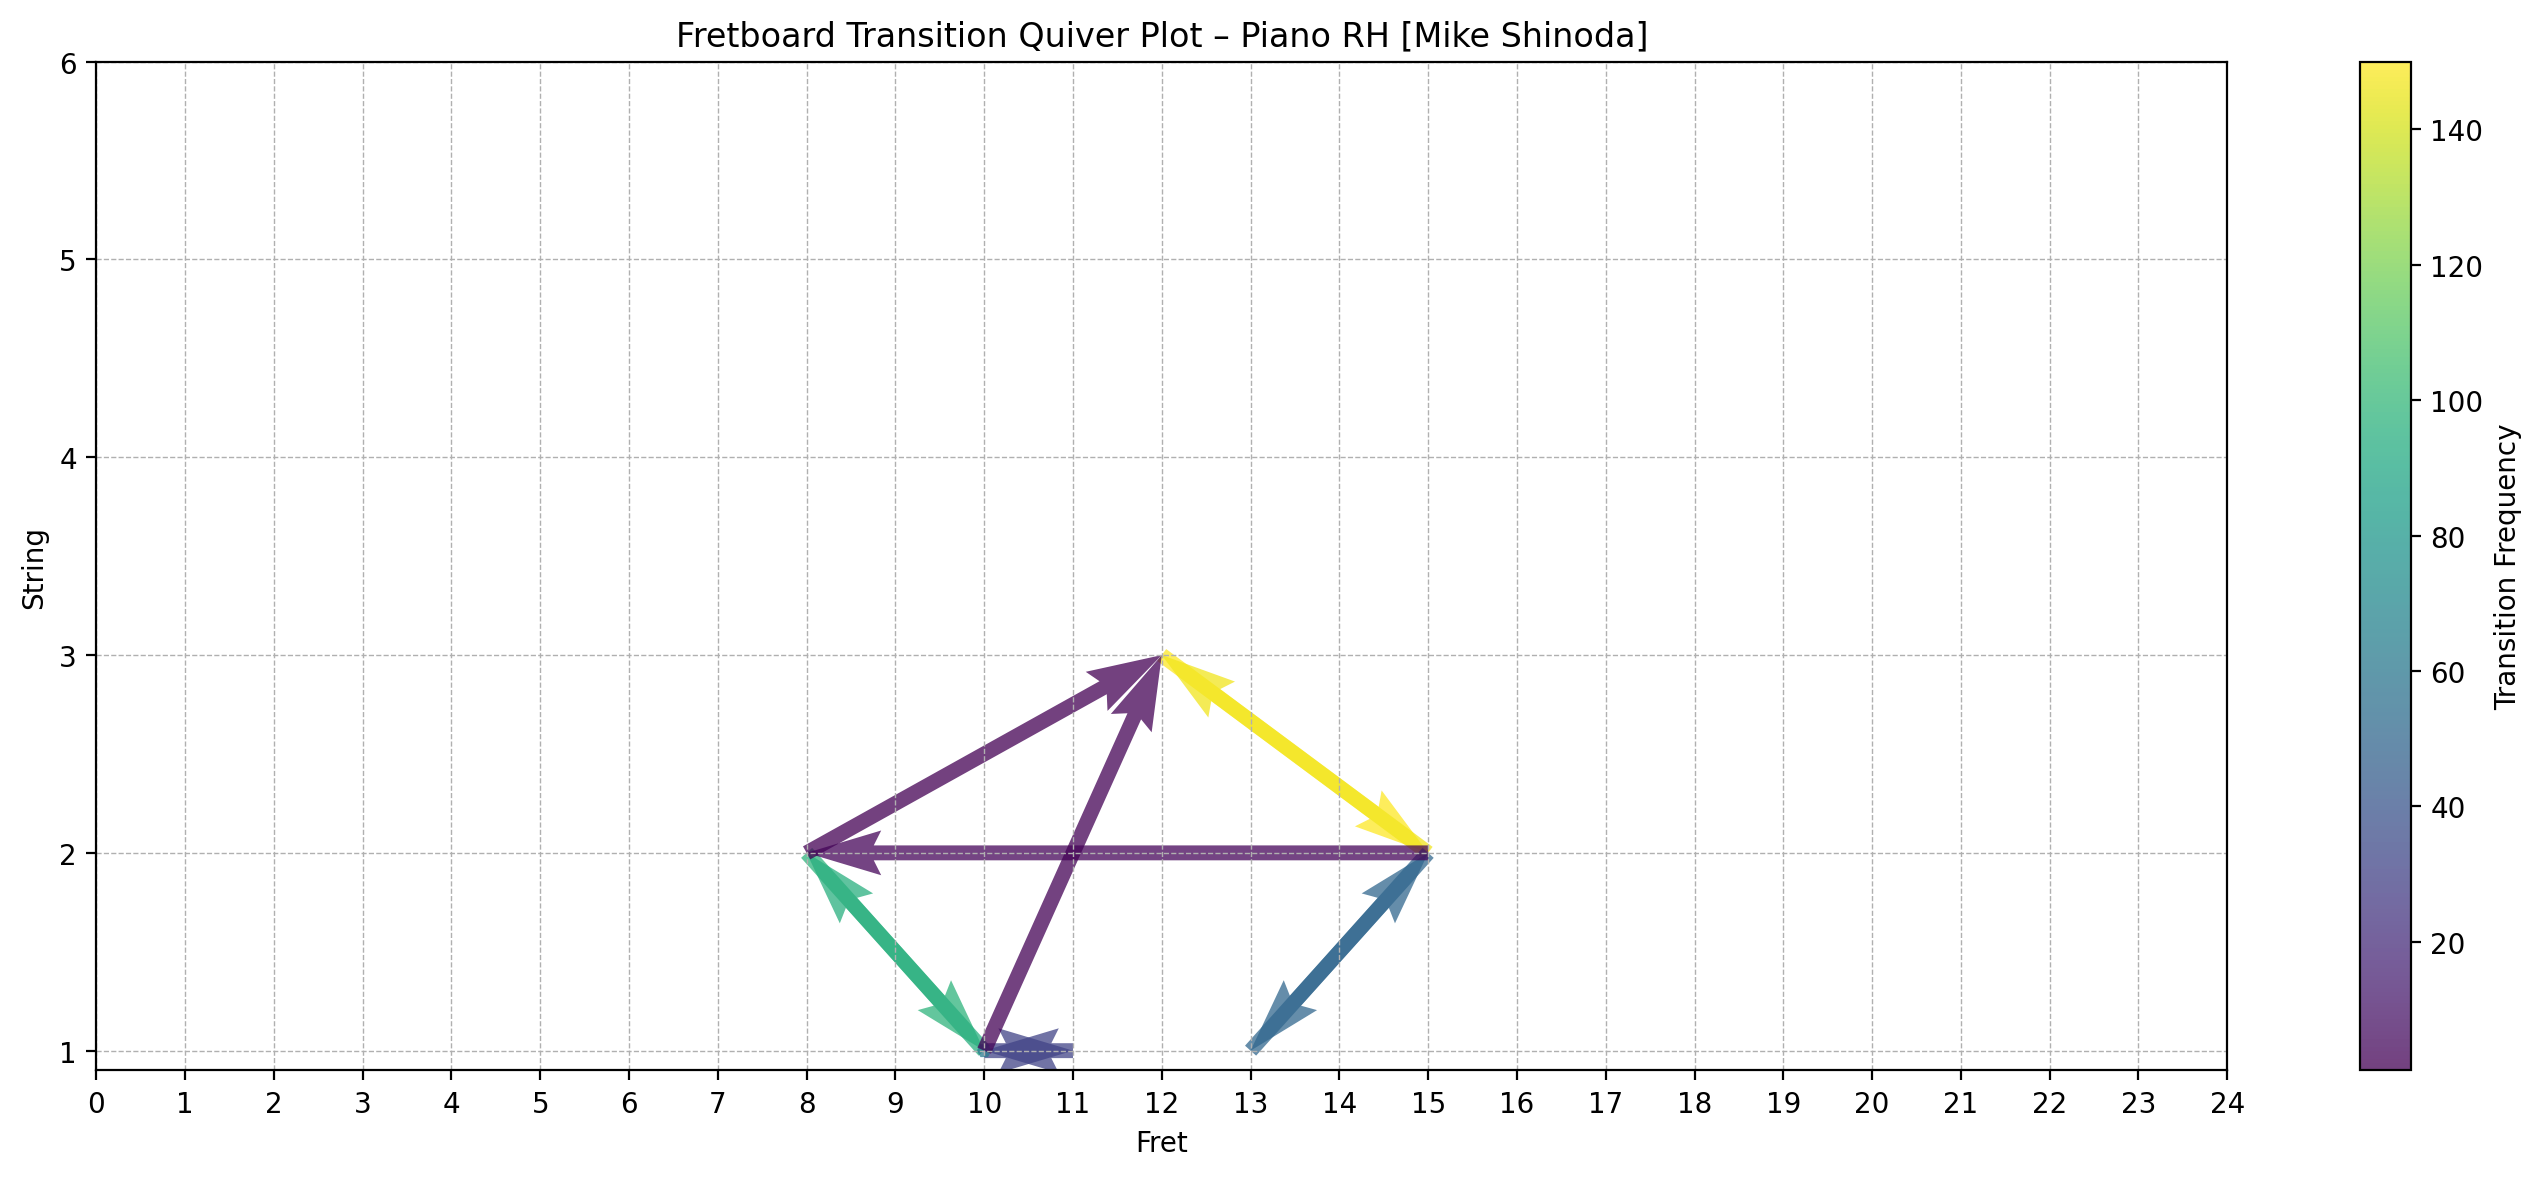

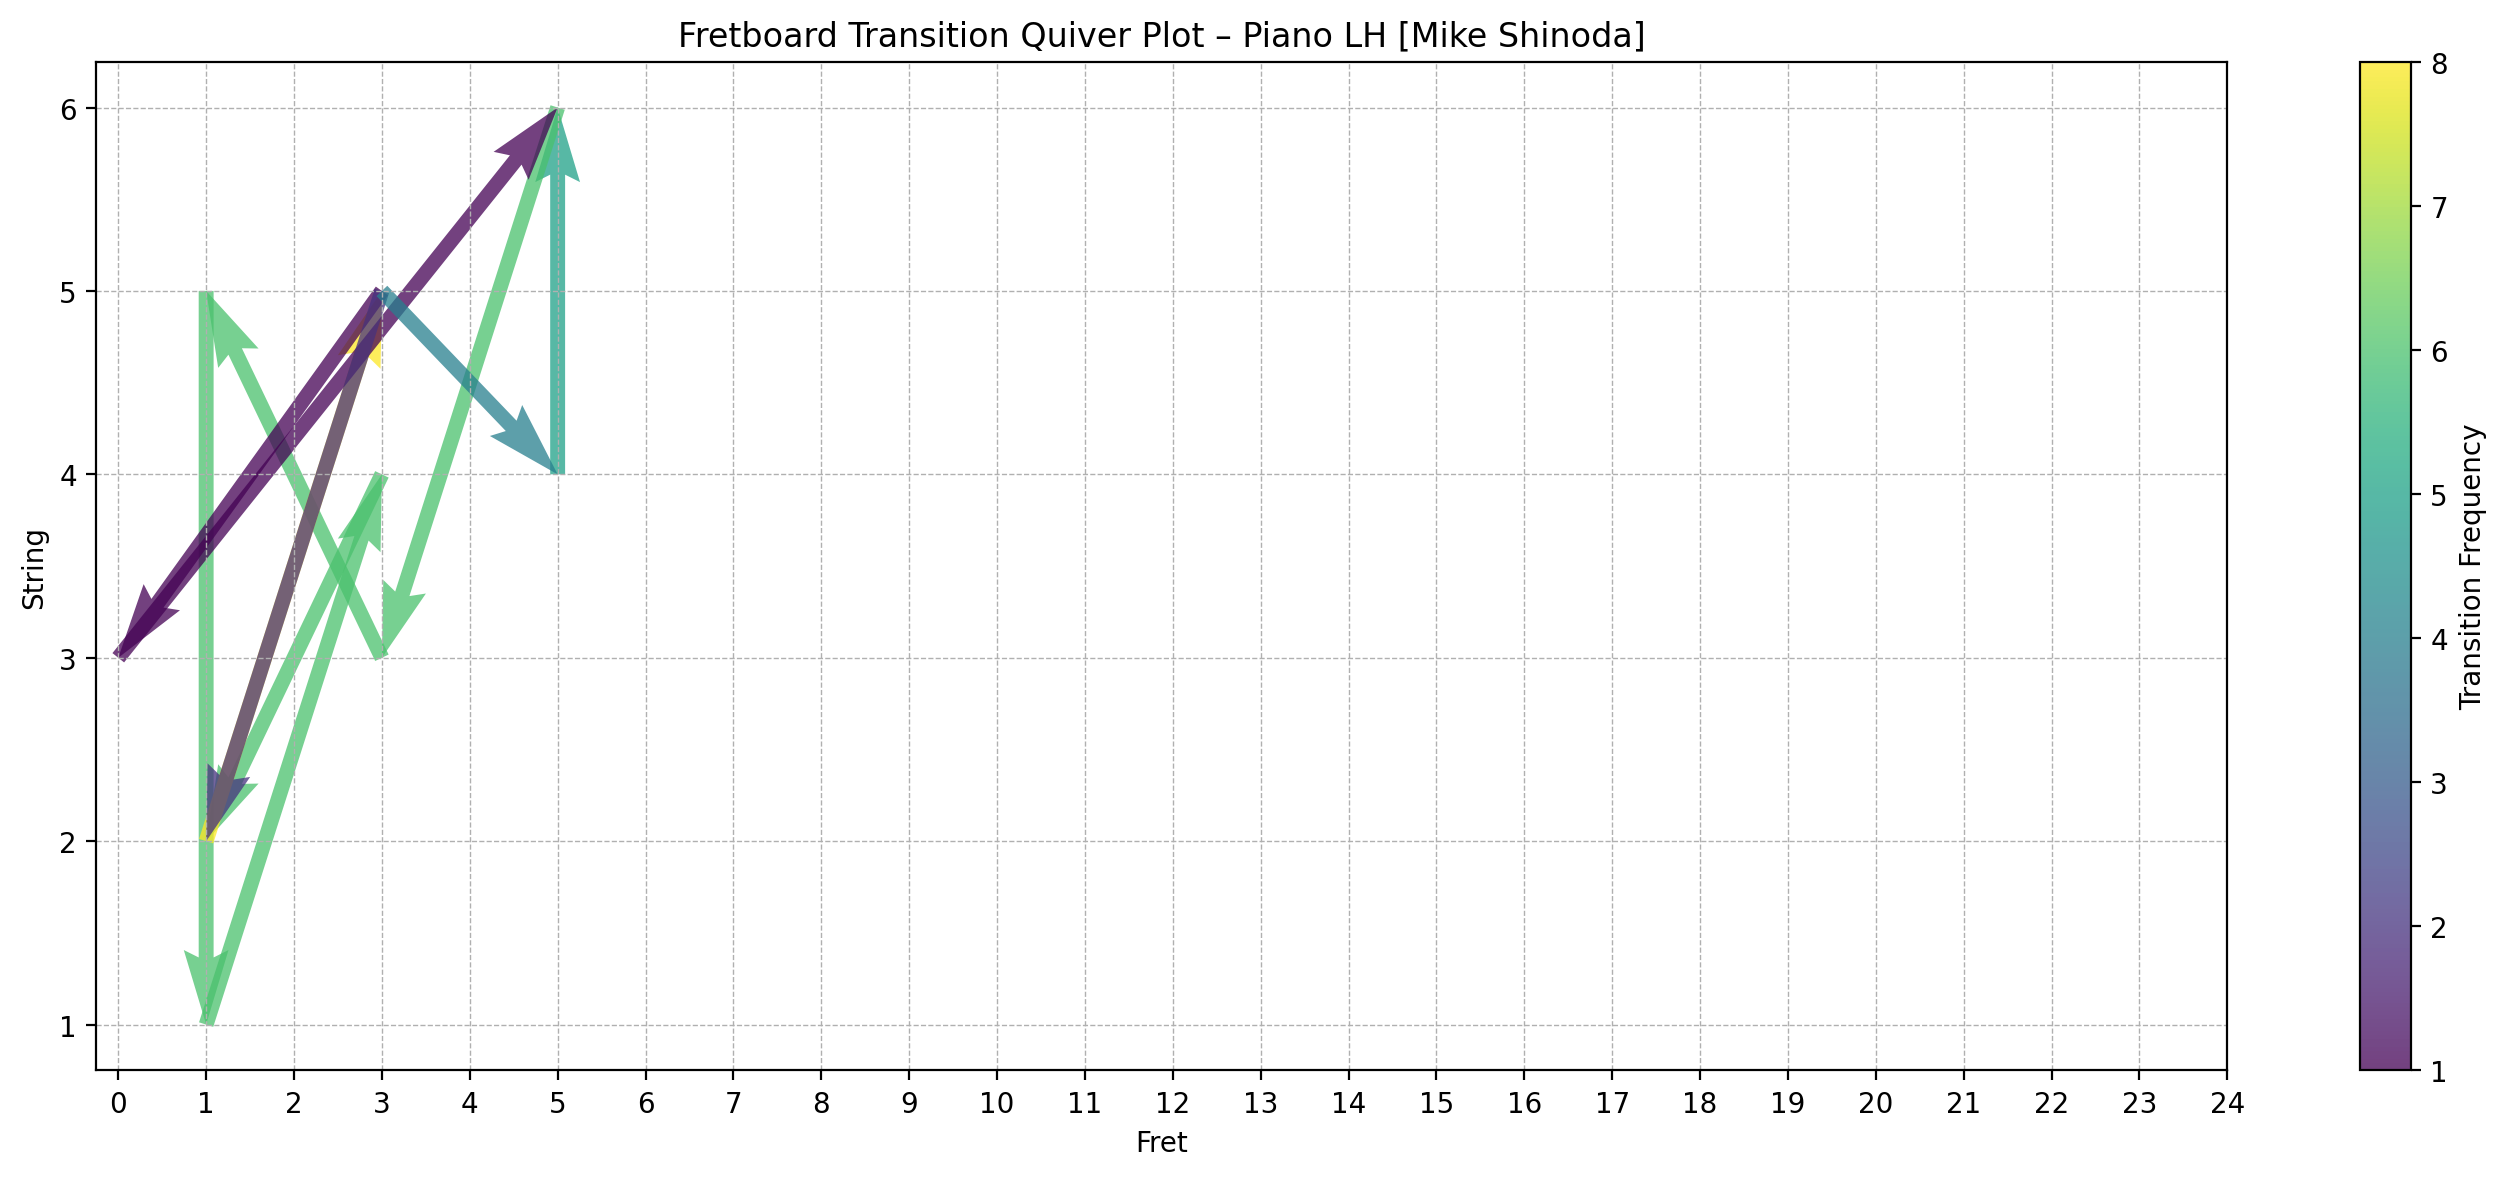

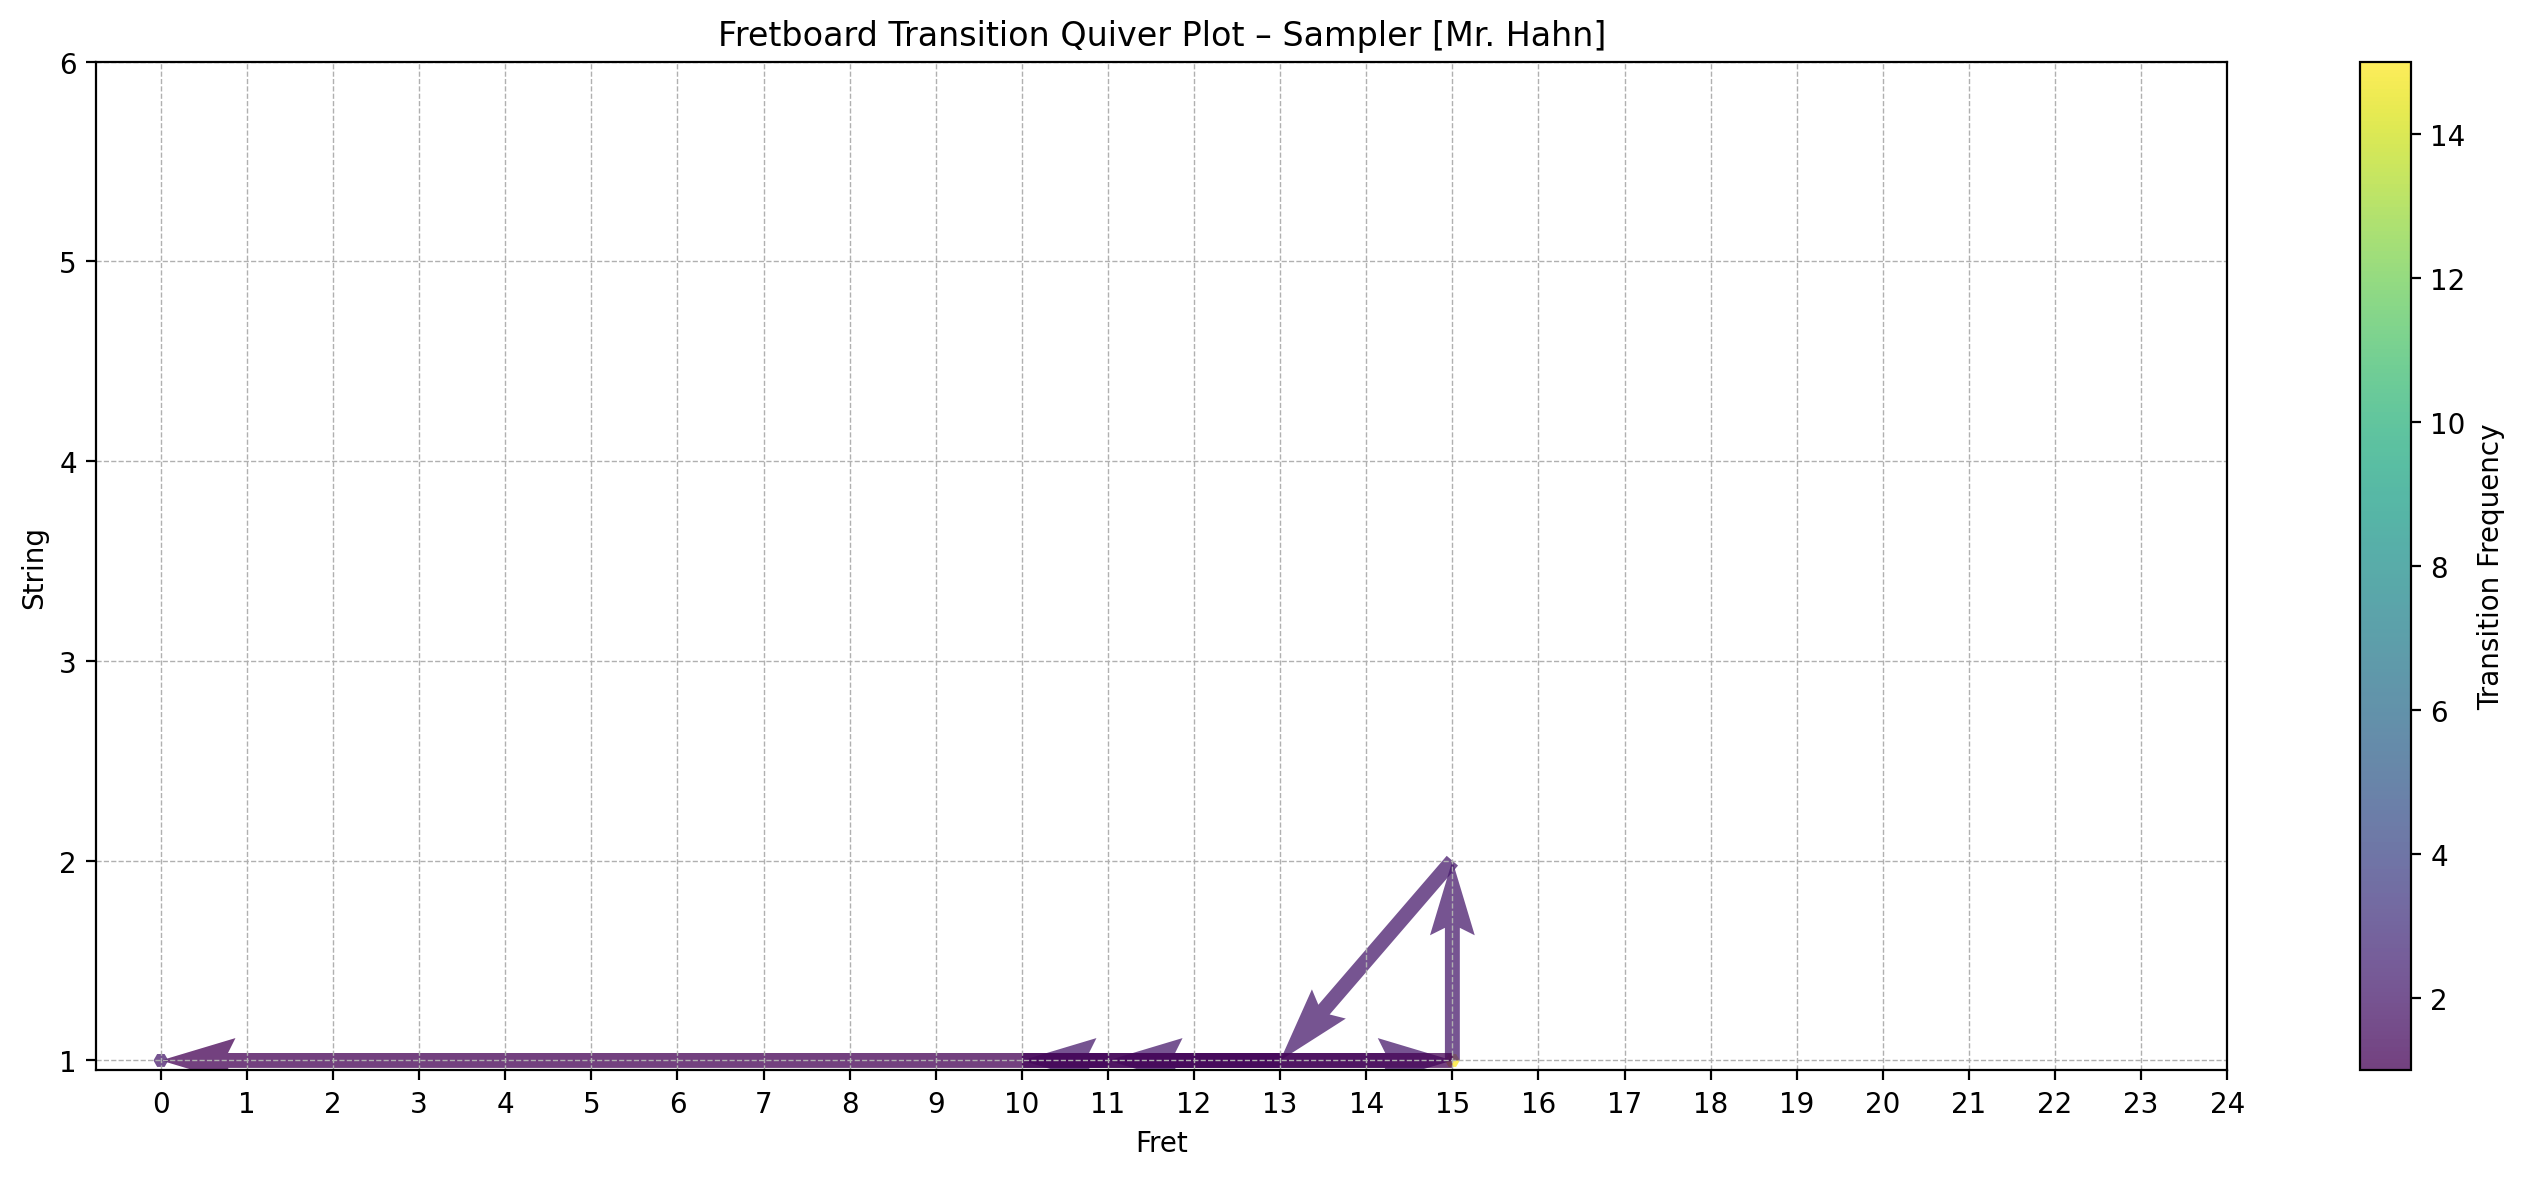

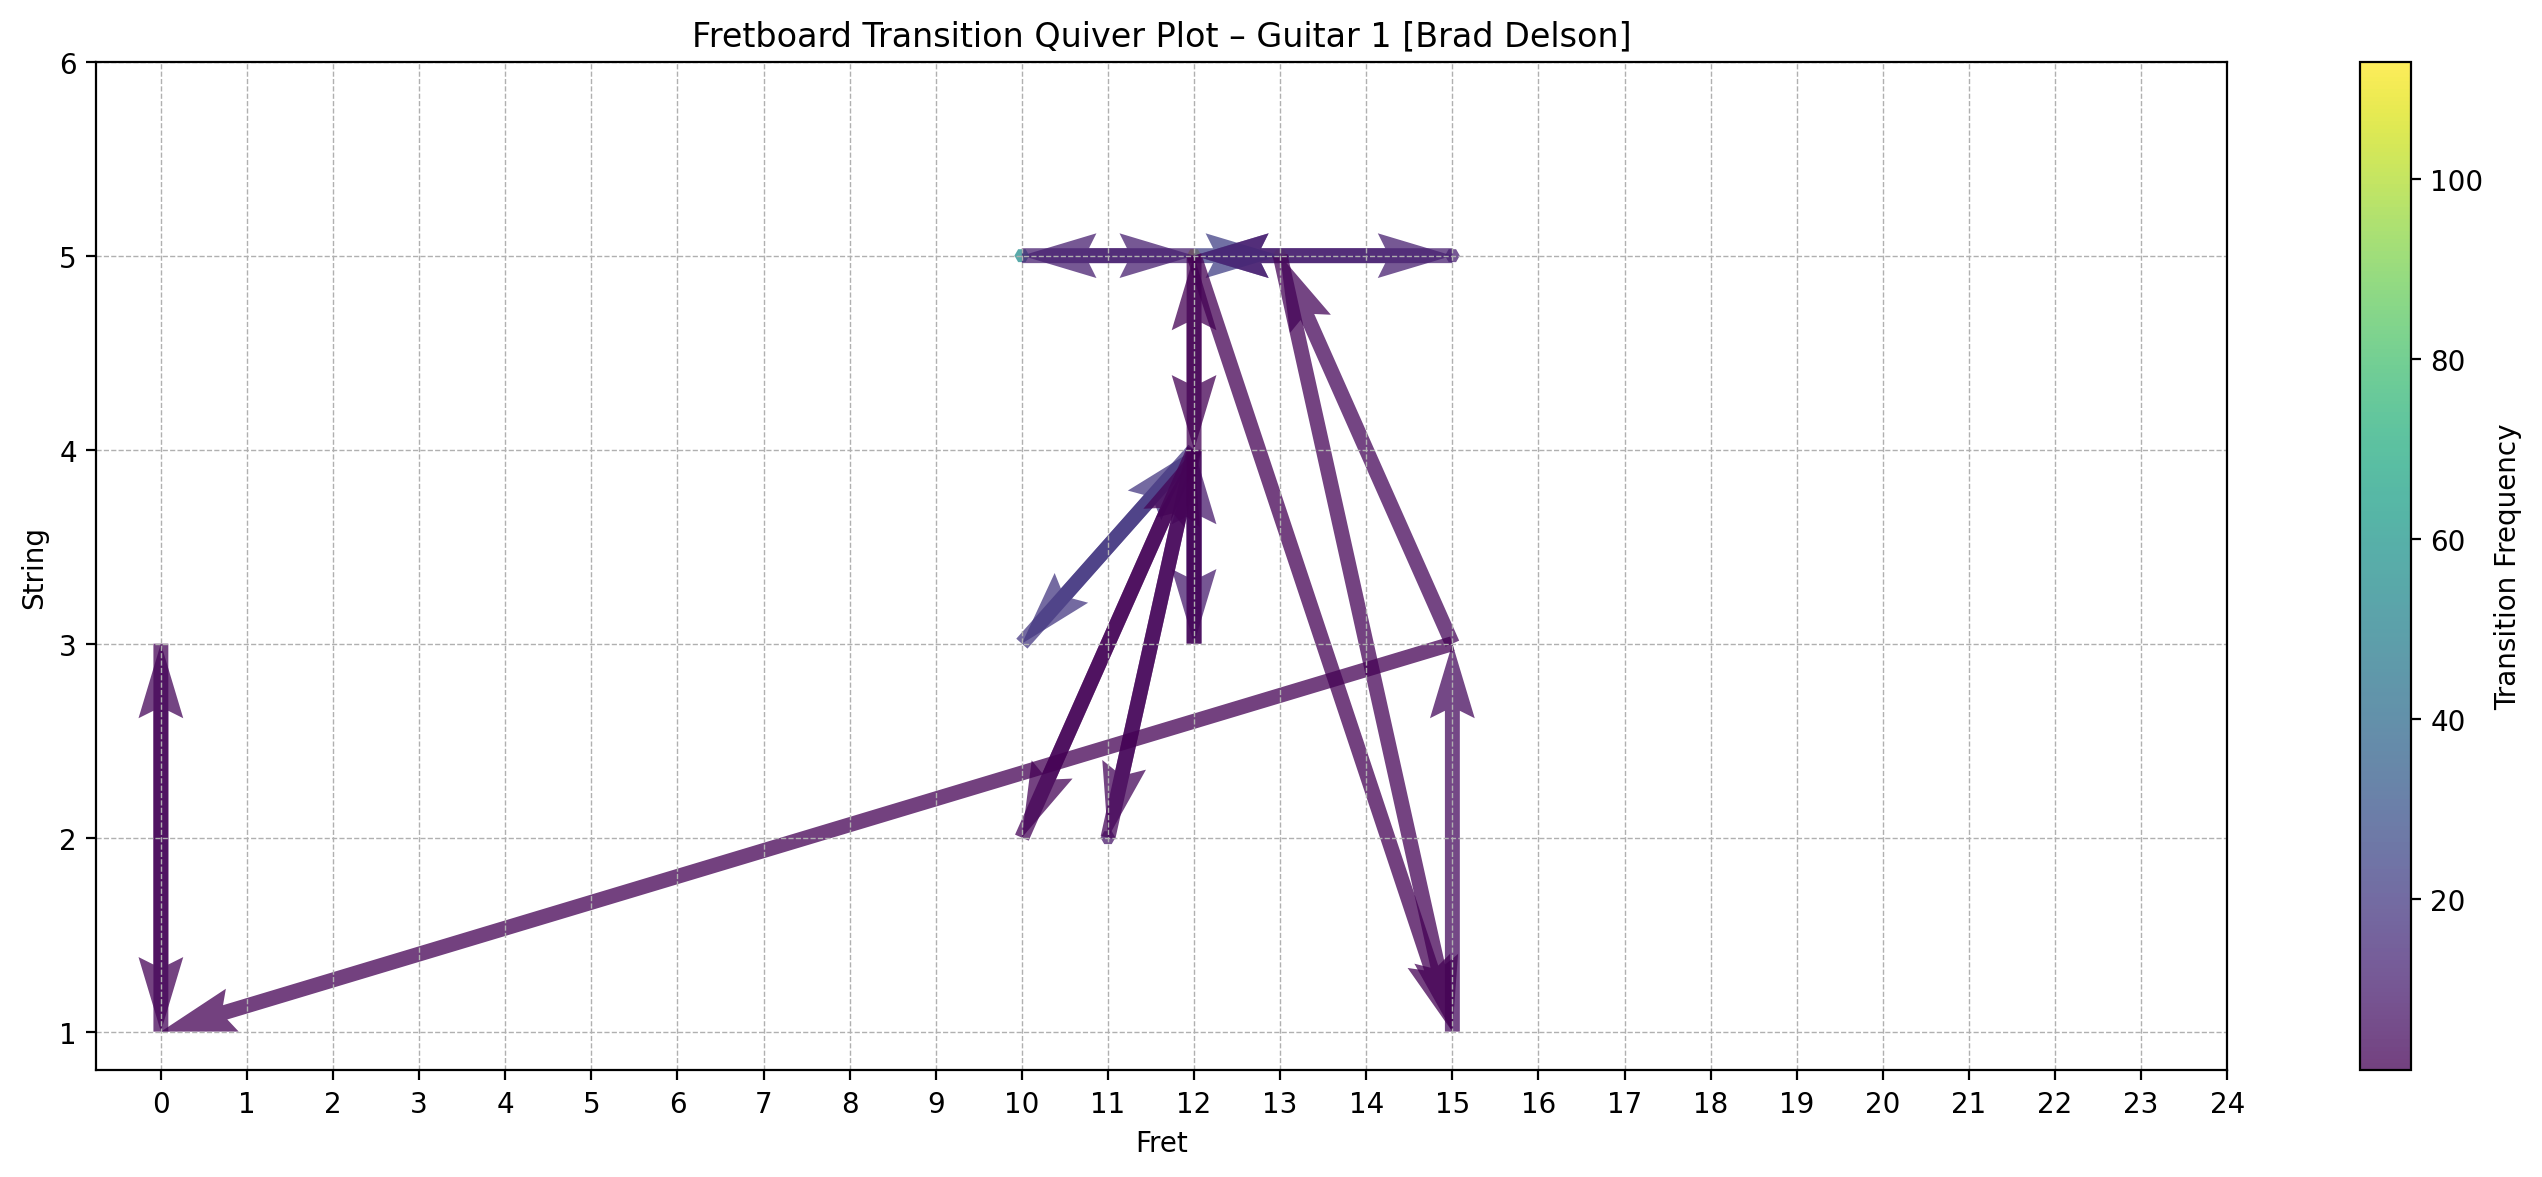

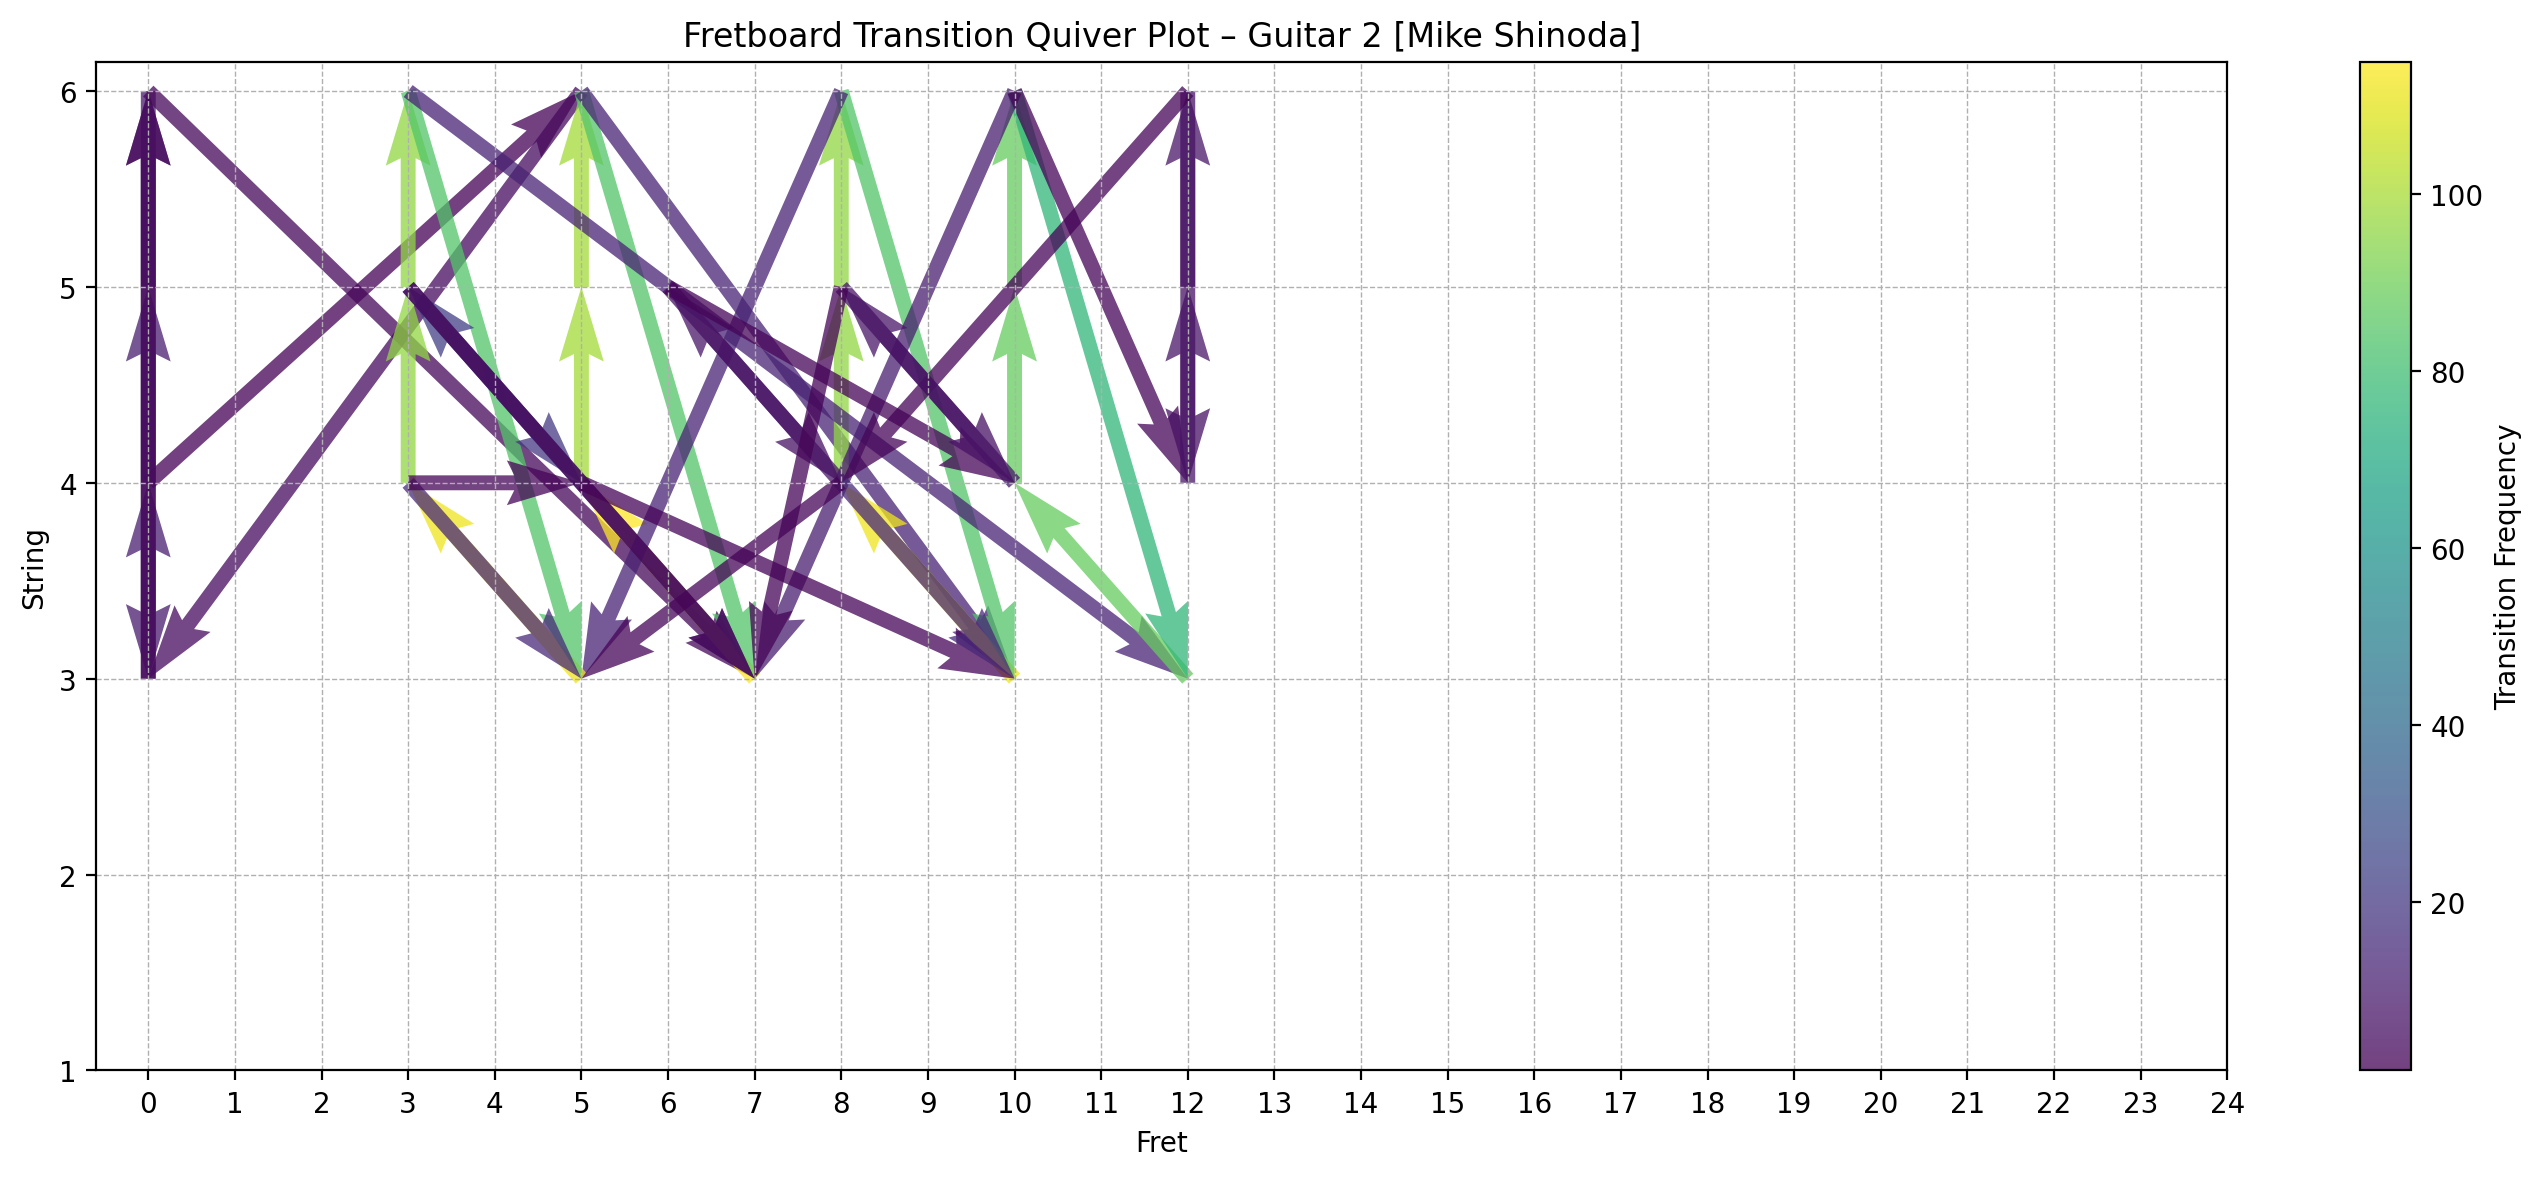

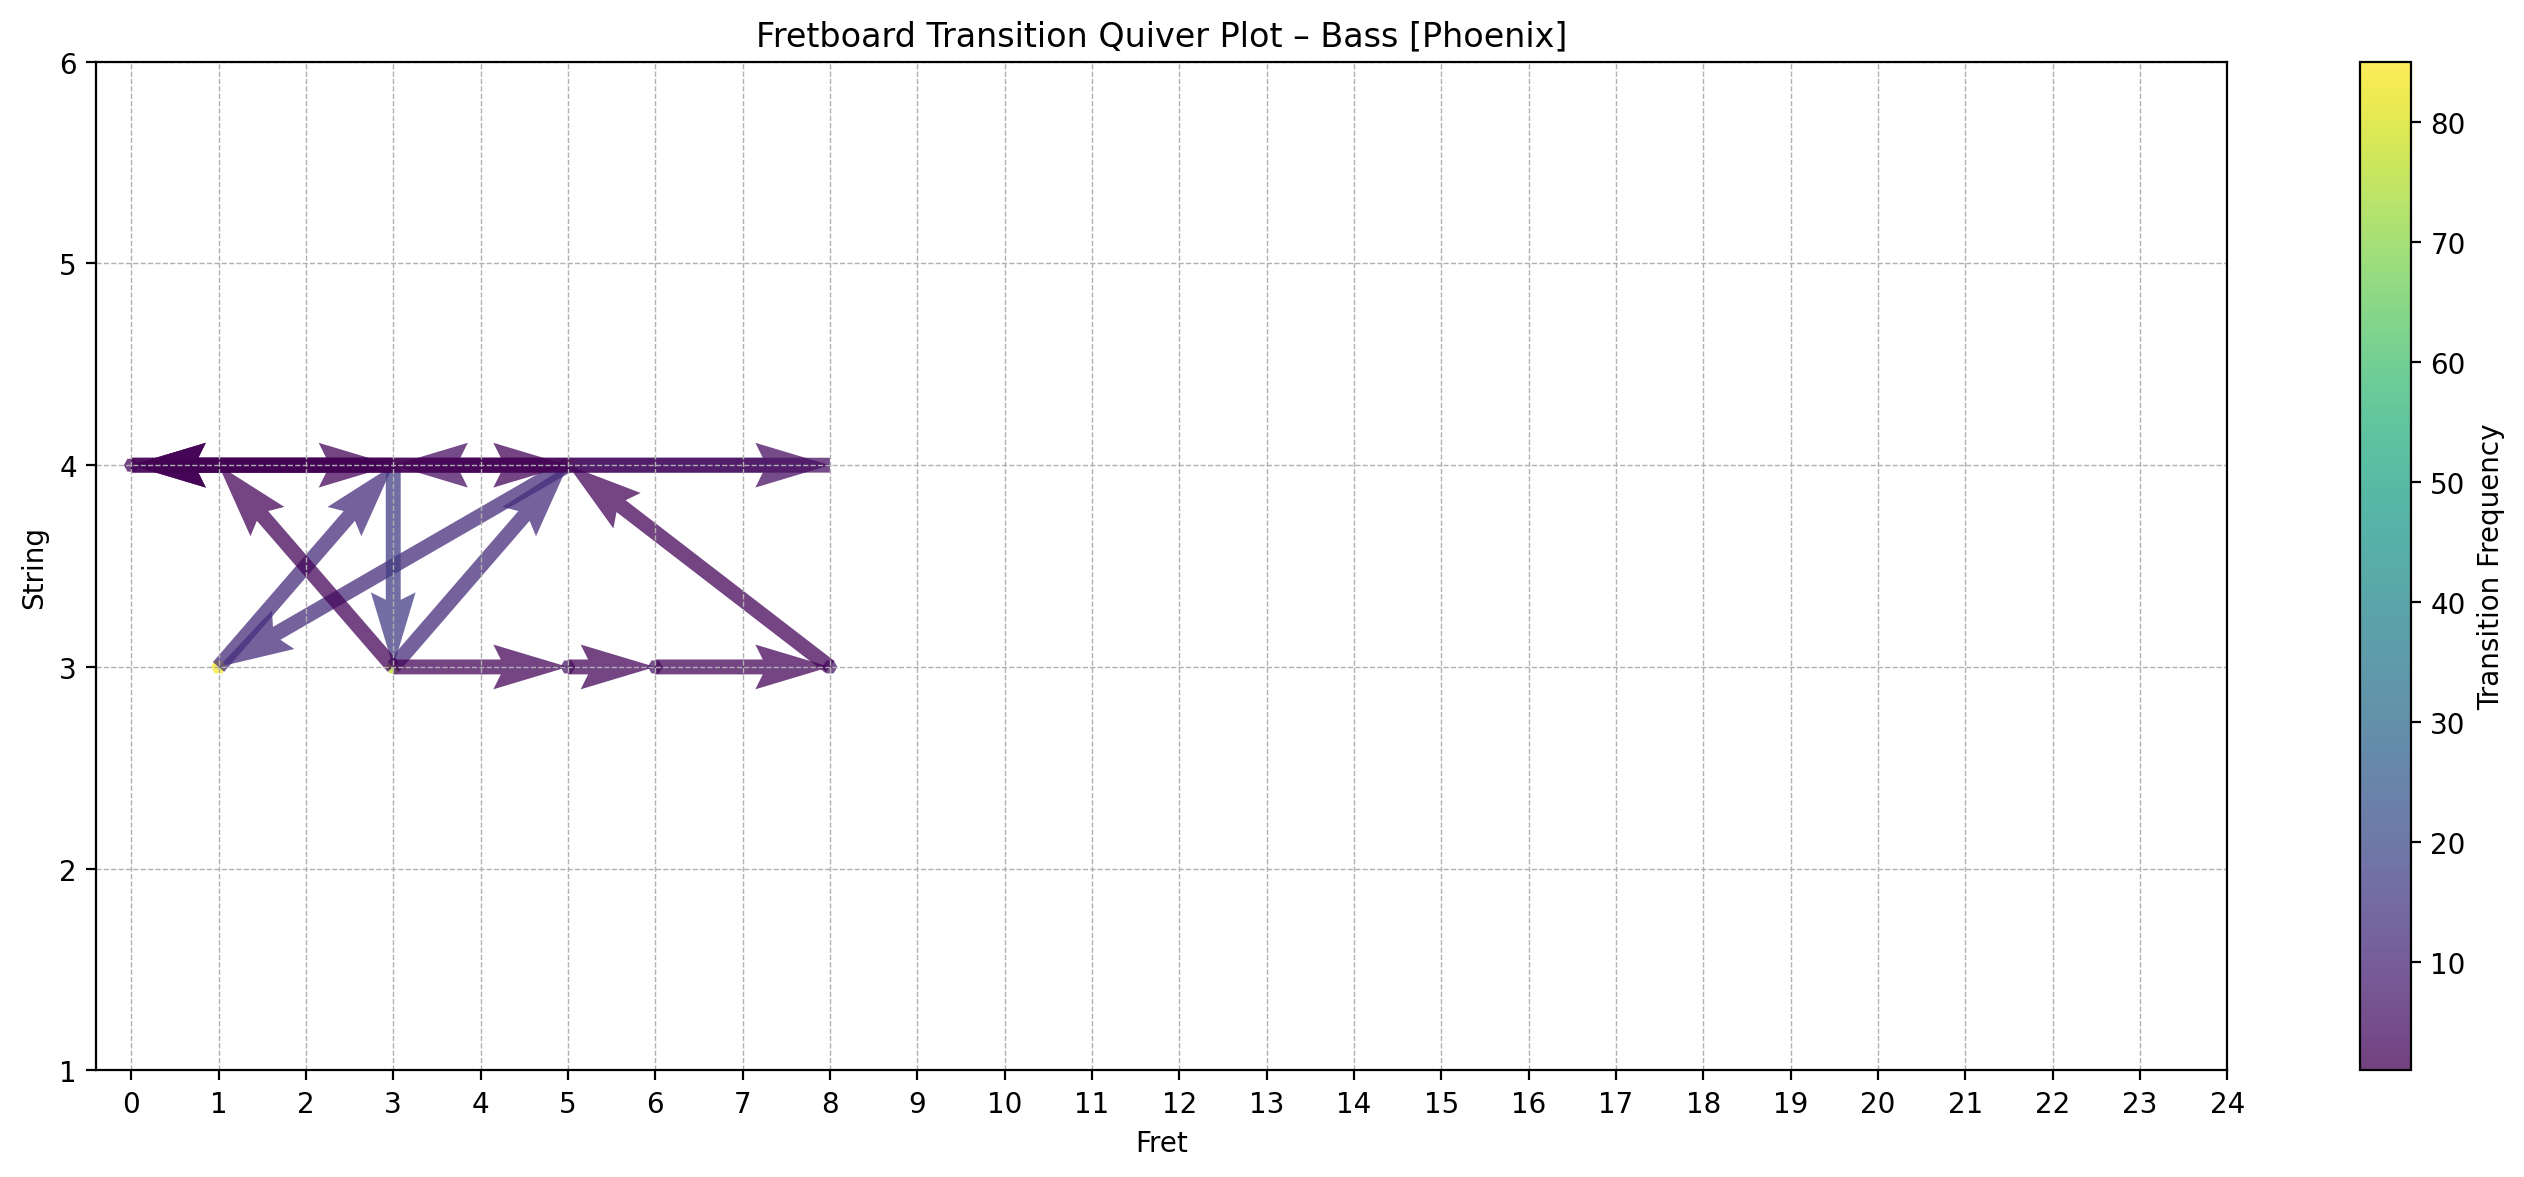

In [17]:
import matplotlib.pyplot as plt
import guitarpro
from collections import defaultdict

# Load your Guitar Pro file
song = guitarpro.parse("../dataset/Drop D/Rock/Linkin Park - What Ive Done (ver 7 by igus).gp4")

# Iterate over each non-percussion track
for track in song.tracks:
    if track.isPercussionTrack:
        continue

    transition_counts = defaultdict(int)
    last_note = None

    for measure in track.measures:
        for voice in measure.voices:
            for beat in voice.beats:
                notes = beat.notes
                for note in notes:
                    current = (note.string, note.value)
                    if last_note:
                        transition_counts[(last_note, current)] += 1
                    last_note = current

    # Skip if no transitions
    if not transition_counts:
        continue

    # Quiver plot data
    X, Y, U, V, W = [], [], [], [], []

    for ((s1, f1), (s2, f2)), count in transition_counts.items():
        X.append(f1)
        Y.append(6 - s1)  # Flip string number
        U.append(f2 - f1)
        V.append((6 - s2) - (6 - s1))
        W.append(count)

    plt.figure(figsize=(14, 6))
    q = plt.quiver(
        X, Y, U, V, W,
        angles='xy', scale_units='xy', scale=1,
        width=0.007,  # slightly thinner arrows
        cmap='viridis', alpha=0.75
    )
    plt.colorbar(q, label="Transition Frequency")
    plt.xticks(range(0, 25))
    plt.yticks(range(6), ["6", "5", "4", "3", "2", "1"])
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlabel("Fret")
    plt.ylabel("String")
    plt.title(f"Fretboard Transition Quiver Plot – {track.name}")
    plt.tight_layout()
    plt.show()